# Using the Atmospheric Blocking 1D Model

### Requirements:
* NumPy
* H5Py (for HDF5 support)
* matplotlib

In [1]:
import AtmosphericBlocking
import numpy as np
import h5py
import sys,os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# start with one
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,2,3])

# now later you get a new subplot; change the geometry of the existing
n = len(fig.axes)
for i in range(n):
    fig.axes[i].change_geometry(n+1, 1, i+1)

# add the new
ax = fig.add_subplot(n+1, 1, n+1)
ax.plot([4,5,6])

plt.show()

FigureCanvasNbAgg()

## Model output

First we load all the output files, using `h5py`. 

In [6]:

os.path.exists('"shell_scripts/output_slow_change_Uref/setup.h5".lock')

False

In [3]:
setup        =  h5py.File("shell_scripts/output_slow_change_Uref/setup.h5")
x            =  setup['grid/x'][:]
noise_params =  h5py.File("shell_scripts/noise_params/parameters.h5")
parameters   =  h5py.File("shell_scripts/output_slow_change_Uref/parameters.h5")

OSError: Unable to create file (unable to open file: name = 'shell_scripts/noise_params/parameters.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

In [ ]:
# print (parameters['Lx'][()])

In [3]:
print (list(noise_params.keys()))
print (list(parameters.keys()))

NameError: name 'noise_params' is not defined

In [5]:
# ls shell_scripts/output_slow_change_Uref/

In [6]:
fnis = (np.array(sorted(glob.glob("shell_scripts/output_slow_change_Uref/snapshots/*.h5"))))

###### Note that each day has 4 data. 1 year has 360*4 data points. 
###### We will separate each year and collect the data together.
###### Total number of years = len(all_files)/(360*4)

As we load the files, we'll dynamically construct NumPy arrays with dimensions [time, distance]. We'll load saved output for $\hat{A}(x,t)$, $F(x,t)$, $\hat{S}(x,t)$, and $C(x,t)$. We'll skip every other file, so we have 900 elements in the timewise axis.

In [7]:
decadal=1; year=360*4;
len(fnis[decadal*year:(decadal+10)*year][360*4*(0):360*4*(1):2])

720

In [8]:
# from IPython.display import clear_output
def combine_data(decadal=0):
    year = 360*4
    Ahat, F, S, C, = 0,0,0,0
    t = []; beta=[]
    for fni in fnis[decadal*year:(decadal+10)*(year):4*12]:
#     for fni in fnis[0:-1]:
        snap = h5py.File(fni)
        clear_output()
        t.append(snap['t'][()])
        beta.append(snap['beta'][()])
        try:
            Ahat = np.vstack([Ahat, snap['A'][:]])
            F = np.vstack([F, snap['F'][:]])
            S = np.vstack([S, snap['S'][:]])
            C = np.vstack([C, snap['C'][:]])
        except:
            Ahat = snap['A'][:]
            F = snap['F'][:]
            S = snap['S'][:]
            C = snap['C'][:]
        print ((t[-1]/(86400*360)) , end =" ") 

    t = np.array(t)
    beta=np.array(beta)    
#     print ((decadal+1), end =" ") 
    return Ahat, F, S, C, beta, t


In [9]:
# from IPython.display import clear_output
def combine_data1(decadal=0):
    year = 360*4
    Ahat, F, S, C, = 0,0,0,0
    t = []; beta=[]
    for fni in fnis[decadal*year:(decadal+10)*year][360*4*(4):360*4*(5):4]:
#     for fni in fnis[0:-1]:
        snap = h5py.File(fni)
        clear_output()
        t.append(snap['t'][()])
        beta.append(snap['beta'][()])
        try:
            Ahat = np.vstack([Ahat, snap['A'][:]])
            F = np.vstack([F, snap['F'][:]])
            S = np.vstack([S, snap['S'][:]])
            C = np.vstack([C, snap['C'][:]])
        except:
            Ahat = snap['A'][:]
            F = snap['F'][:]
            S = snap['S'][:]
            C = snap['C'][:]
        print ((t[-1]/(86400*360)) , end =" ") 

    t = np.array(t)
    beta=np.array(beta)    
#     print ((decadal+1), end =" ") 
    return Ahat, F, S, C, beta, t


$u =40 - \alpha (\hat{A}+A_{o})$

$A_0(x) = Y\left[1-\cos\left(\frac{2\pi nx}{L_x}\right)\right]$

$F=$

In [10]:
Y  = 10
n  = 2
Lx = parameters['Lx'][()]
A0 = Y*(1-np.cos(2*np.pi*n*x/Lx))
alpha = parameters['alpha'][()]

In [102]:
Ahat0,  F0,  S0,  C0,  beta0,  t0         = combine_data1(decadal=0)
Ahat10, F10, S10, C10, beta10, t10        = combine_data1(decadal=10)
Ahat20, F20, S20, C20, beta20, t20        = combine_data1(decadal=20)
Ahat30, F30, S30, C30, beta30, t30        = combine_data1(decadal=30)
Ahat40, F40, S40, C40, beta40, t40        = combine_data1(decadal=40)

44.99791666666667 

In [103]:
Ahat50, F50, S50, C50, beta50, t50        = combine_data1(decadal=50)
Ahat60, F60, S60, C60, beta60, t60        = combine_data1(decadal=60)
Ahat70, F70, S70, C70, beta70, t70        = combine_data1(decadal=70)
Ahat80, F80, S80, C80, beta80, t80        = combine_data1(decadal=80)

84.99791666666667 

In [104]:
Ahat90,  F90,  S90,  C90,  beta90,  t90   = combine_data1(decadal=90)
Ahat100, F100, S100, C100, beta100, t100  = combine_data1(decadal=100)
Ahat110, F110, S110, C110, beta110, t110  = combine_data1(decadal=110)
Ahat120, F120, S120, C120, beta120, t120  = combine_data1(decadal=120)

124.99791666666667 

In [105]:
Ahat130, F130, S130, C130, beta130, t130  = combine_data1(decadal=130)
Ahat140, F140, S140, C140, beta140, t140  = combine_data1(decadal=140)
Ahat150, F150, S150, C150, beta150, t150  = combine_data1(decadal=150)
Ahat160, F160, S160, C160, beta160, t160  = combine_data1(decadal=160)

164.99791666666667 

In [106]:
Ahat170, F170, S170, C170, beta170, t170  = combine_data1(decadal=170)
Ahat180, F180, S180, C180, beta180, t180  = combine_data1(decadal=180)
Ahat190, F190, S190, C190, beta190, t190  = combine_data1(decadal=190)
Ahat200, F200, S200, C200, beta200, t200  = combine_data1(decadal=200)

204.99791666666667 

In [107]:
Ahat210, F210, S210, C210, beta210, t210  = combine_data1(decadal=210)
Ahat220, F220, S220, C220, beta220, t220  = combine_data1(decadal=220)
Ahat230, F230, S230, C230, beta230, t230  = combine_data1(decadal=230)
Ahat240, F240, S240, C240, beta240, t240  = combine_data1(decadal=240)

244.99791666666667 

In [108]:
Ahat250, F250, S250, C250, beta250, t250  = combine_data1(decadal=250)
Ahat260, F260, S260, C260, beta260, t260  = combine_data1(decadal=260)
Ahat270, F270, S270, C270, beta270, t270  = combine_data1(decadal=270)
Ahat280, F280, S280, C280, beta280, t280  = combine_data1(decadal=280)

284.99791666666664 

In [109]:
Ahat290, F290, S290, C290, beta290, t290  = combine_data1(decadal=290)

294.99791666666664 

In [110]:
Ahat300, F300, S300, C300, beta300, t300  = combine_data1(decadal=300)

$u =\beta - \alpha (\hat{A}+A_{o})$ ;

$A_0(x) = Y\left[1-\cos\left(\frac{2\pi nx}{L_x}\right)\right]$

$F(x,t) = \left(C(x)-\alpha\hat{A}(x,t)\right)\hat{A}(x,t)$

In [11]:
# # Di=10
# # Df=20
# def plot_each_decade(Di=10,Df=20, j=0, k=-1):
#     x = setup['grid/x'][:]
#     # it0 = np.where(t/86400 > 0+260)[0][0]
#     plt.figure(figsize=(15,4))
#     plt.subplot(1,4,1)
#     Smin=np.sqrt(np.min([eval("S%i"%i) for i in np.arange(0,300,10)]))
#     Smax=np.sqrt(np.max([eval("S%i"%i) for i in np.arange(0,300,10)]))
#     for i in np.arange(Di,Df,10):
#         plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], np.sqrt(eval("S%i"%i))[j:k,:], np.linspace(Smin, Smax, 20));    #plt.colorbar()
#     # plt.yscale('log')
#     plt.ylim(Di,Df)
#     plt.colorbar()

#     plt.subplot(1,4,2)
#     plt.title(r"F [m$^2$/s$^2$]", fontsize=15)
#     Fmin=0 #(np.min([(eval("Ahat%i"%i))*( (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) ) for i in np.arange(0,300,10)]))
#     Fmax=(np.max([(eval("Ahat%i"%i))*( (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) ) for i in np.arange(0,300,10)]))
#     for i in np.arange(Di,Df,10):
#         plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], ((eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) )[j:k,:], np.linspace(Fmin, Fmax, 20), cmap=plt.cm.afmhot_r);    
#     # plt.yscale('log')
#     plt.ylim(Di,Df)
#     plt.colorbar()

#     plt.subplot(1,4,3)
#     plt.title("A [m/s]", fontsize=15)
#     Amin=(np.min([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
#     Amax=(np.max([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
#     for i in np.arange(Di,Df,10):
#         plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (A0+(eval("Ahat%i"%i)))[j:k,:], np.linspace(Amin, Amax, 20), cmap='viridis'); 
#     plt.colorbar()
#     plt.ylim(Di,Df)
#     # plt.yscale('log')
    
#     plt.subplot(1,4,4)
#     plt.title("u [m/s]", fontsize=15)
#     umin=(np.min([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
#     umax=(np.max([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
#     for i in np.arange(Di,Df,10):
#         plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (40-alpha*(A0+(eval("Ahat%i"%i))))[j:k,:], np.linspace(umin, umax, 20), cmap='viridis'); 
#     plt.colorbar()
#     plt.ylim(Di,Df)
#     # plt.yscale('log')
    
#     plt.suptitle("%i to %i years"%(Di,Df), fontsize=18)
# #     plt.tight_layout()


In [12]:
# for i in np.arange(0,300,10):
#     plot_each_decade(Di=i,Df=i+10)

In [13]:
# for i in np.arange(0,300,10):
#     plot_each_decade(Di=i,Df=i+10,j=-360, k=-1)

In [14]:
# Di=10
# Df=20
def plot_each_decade1(Di=10,Df=20, j=0, k=-1):
    x = setup['grid/x'][:]
    # it0 = np.where(t/86400 > 0+260)[0][0]
    plt.figure(figsize=(15,4))
    plt.subplot(1,4,1)
    Smin=np.sqrt(np.min([eval("S%i"%i) for i in np.arange(0,300,10)]))
    Smax=np.sqrt(np.max([eval("S%i"%i) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], np.sqrt(eval("S%i"%i))[j:k,:], np.linspace(Smin, Smax, 20));    #plt.colorbar()
    # plt.yscale('log')
#     plt.ylim(Di,Df)
    plt.colorbar()

    plt.subplot(1,4,2)
    plt.title(r"F [m$^2$/s$^2$]", fontsize=15)
    Fmin=(np.min([(eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    Fmax=(np.max([(eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], ((eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) )[j:k,:], np.linspace(Fmin, Fmax, 20), cmap=plt.cm.afmhot_r);    
    # plt.yscale('log')
#     plt.ylim(Di,Df)
    plt.colorbar()

    plt.subplot(1,4,3)
    plt.title("A [m/s]", fontsize=15)
    Amin=(np.min([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    Amax=(np.max([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (A0+(eval("Ahat%i"%i)))[j:k,:], np.linspace(Amin, Amax, 20), cmap='viridis'); 
    plt.colorbar()
#     plt.ylim(Di,Df)
    # plt.yscale('log')
    
    plt.subplot(1,4,4)
    plt.title("u [m/s]", fontsize=15)
    umin=(np.min([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
    umax=(np.max([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (40-alpha*(A0+(eval("Ahat%i"%i))))[j:k,:], np.linspace(umin, umax, 20), cmap='viridis'); 
    plt.colorbar()
#     plt.ylim(Di,Df)
    # plt.yscale('log')
    
    plt.suptitle(r"$\beta$ = %1.2f [m/s]"%(eval("beta%i"%i).mean()), fontsize=18)
    plt.tight_layout()


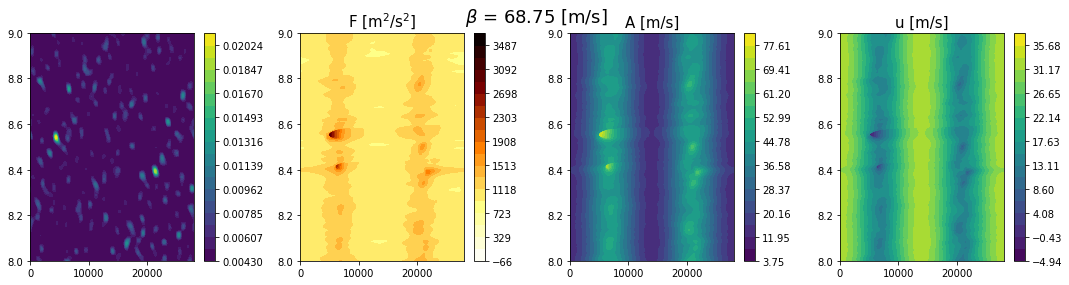

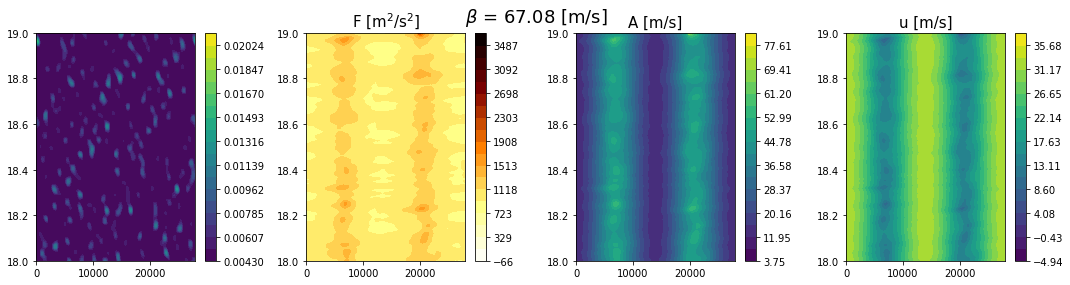

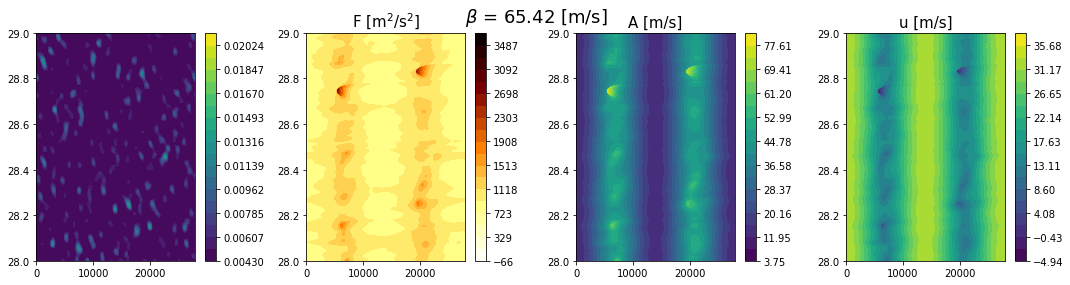

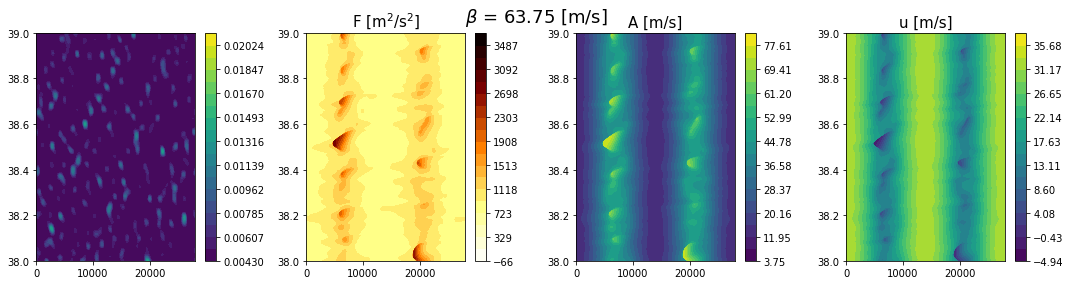

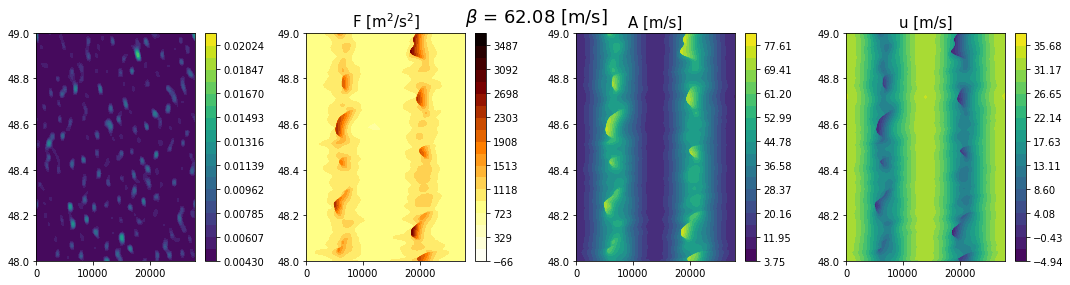

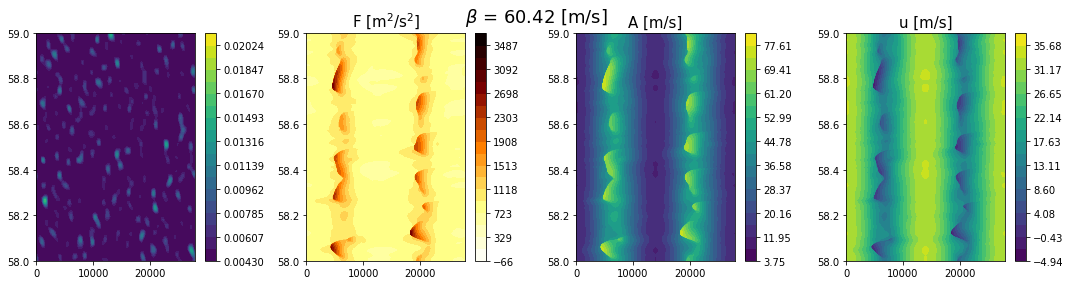

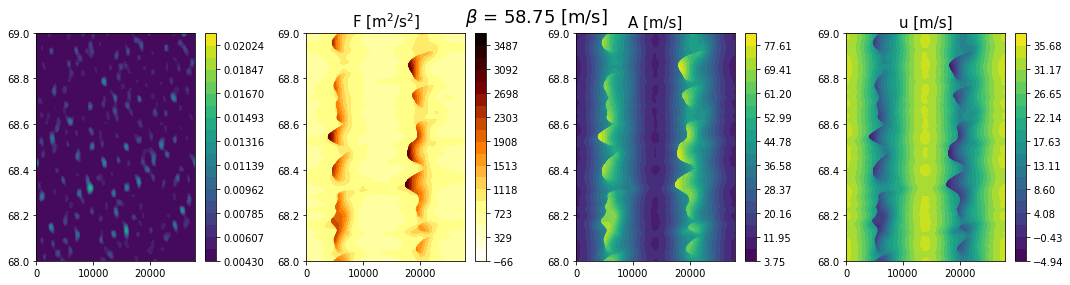

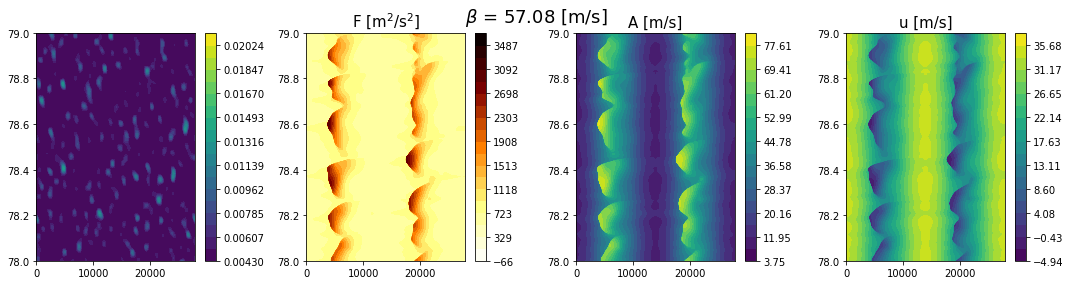

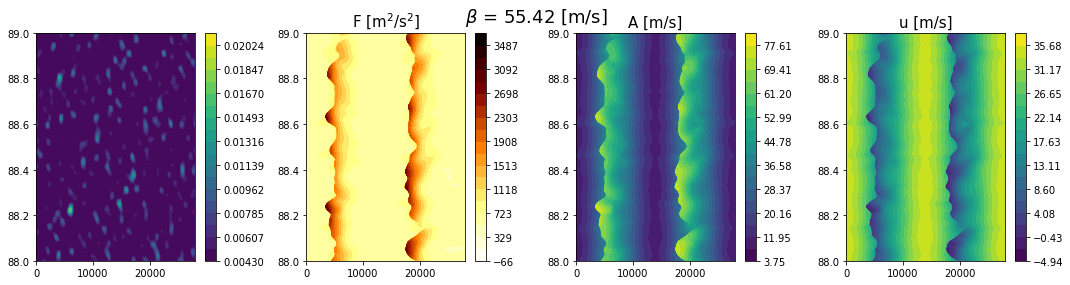

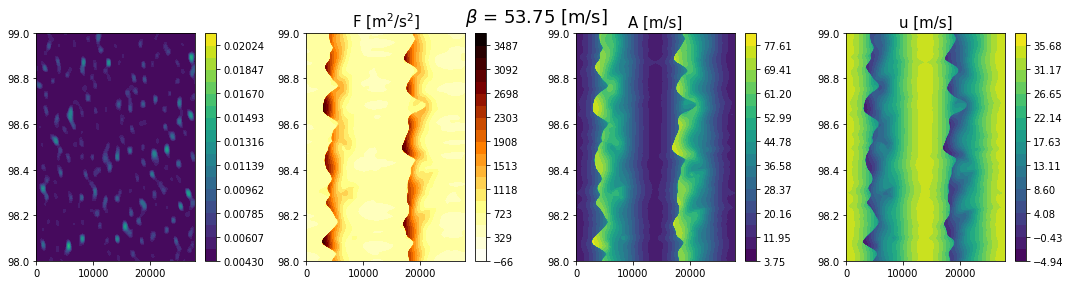

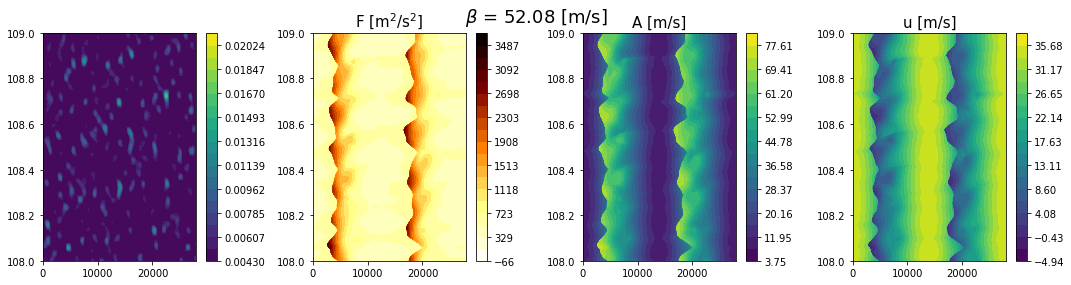

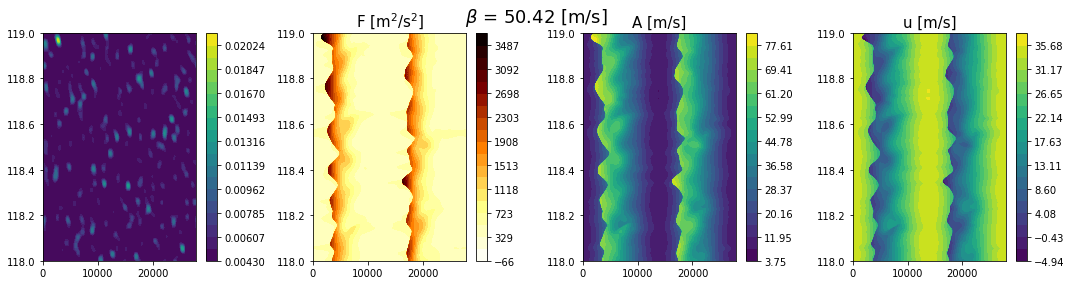

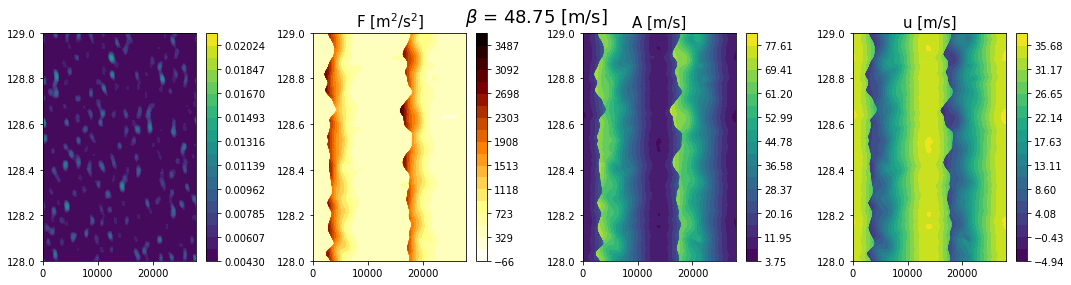

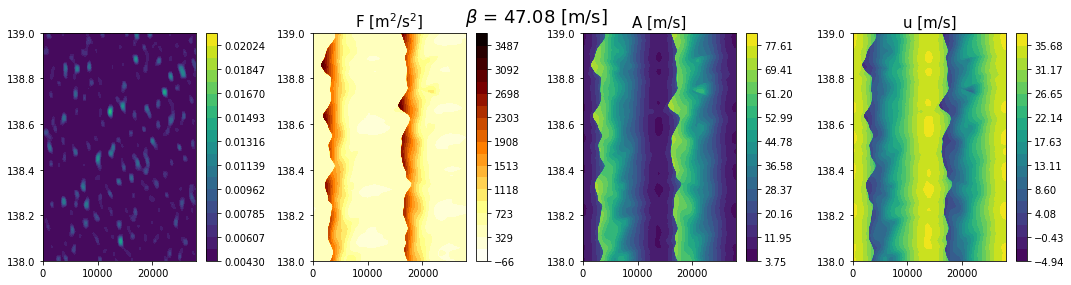

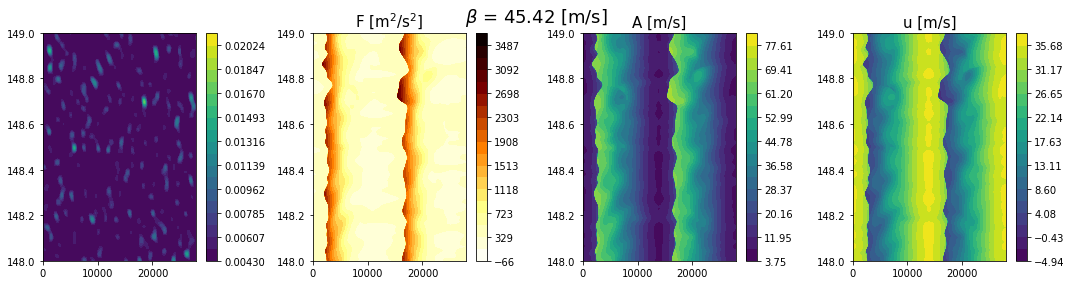

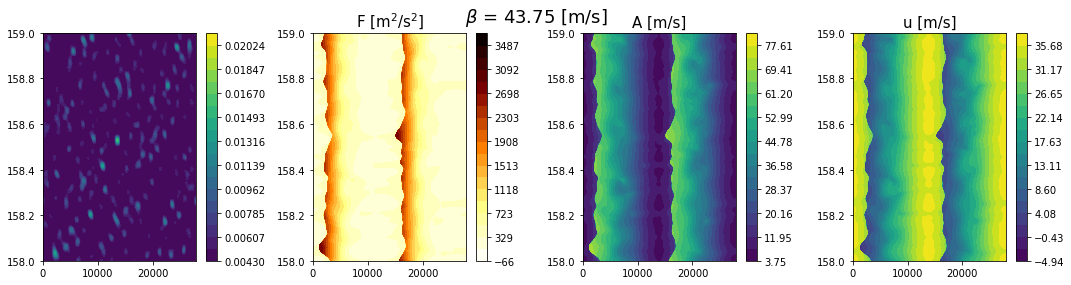

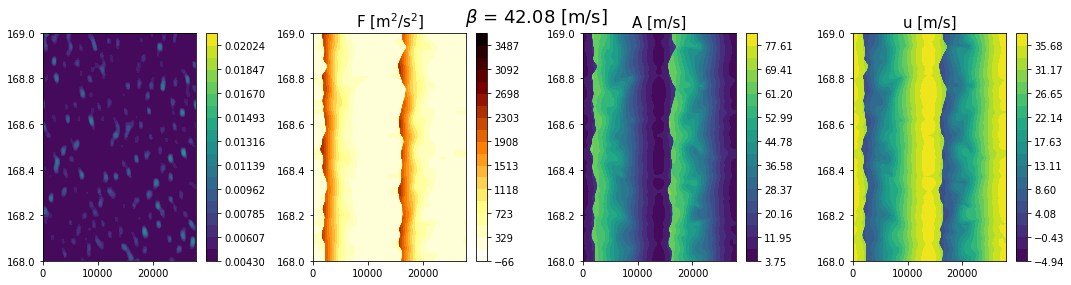

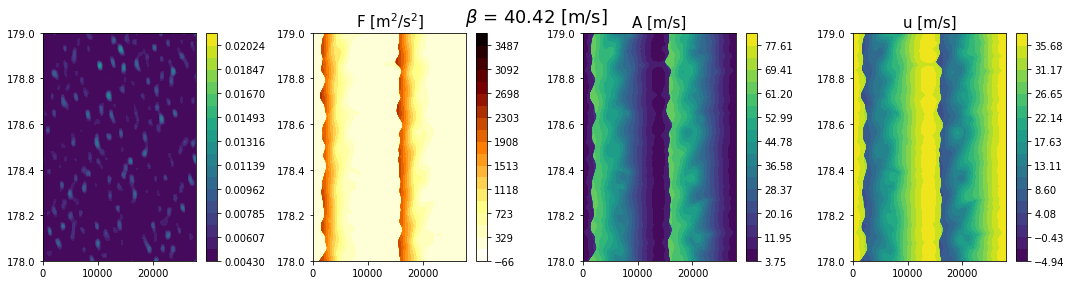

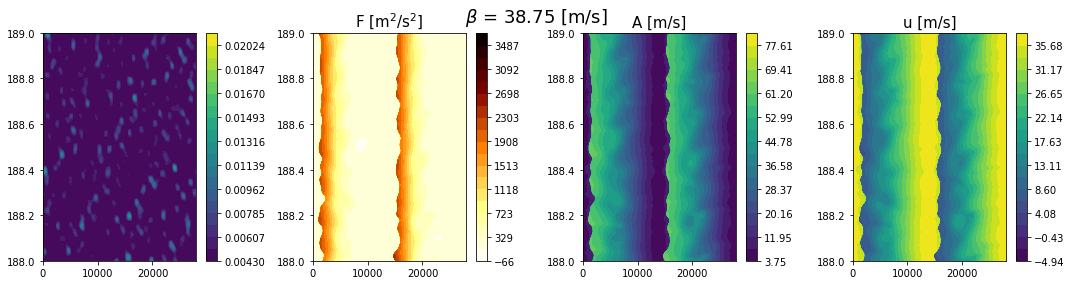

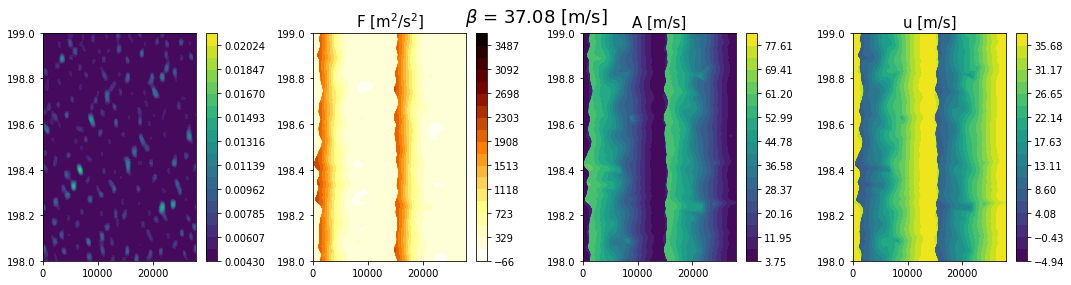

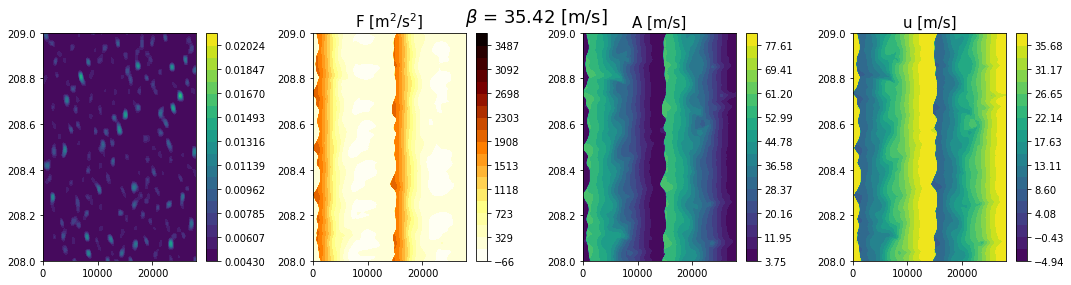

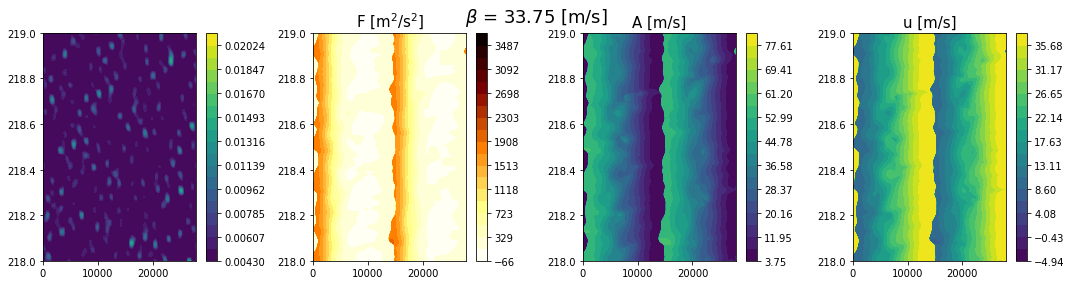

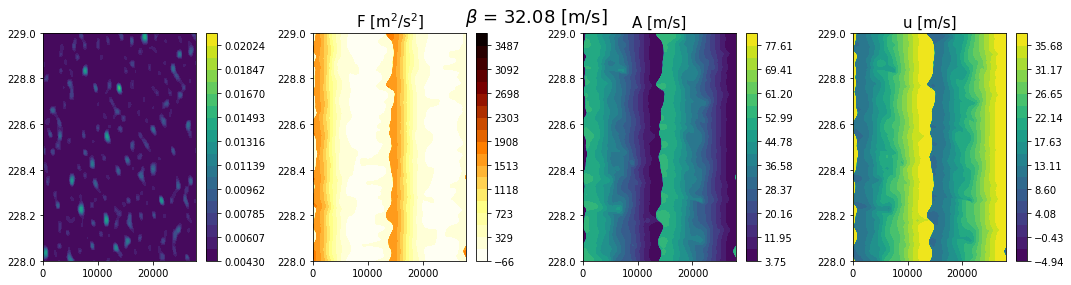

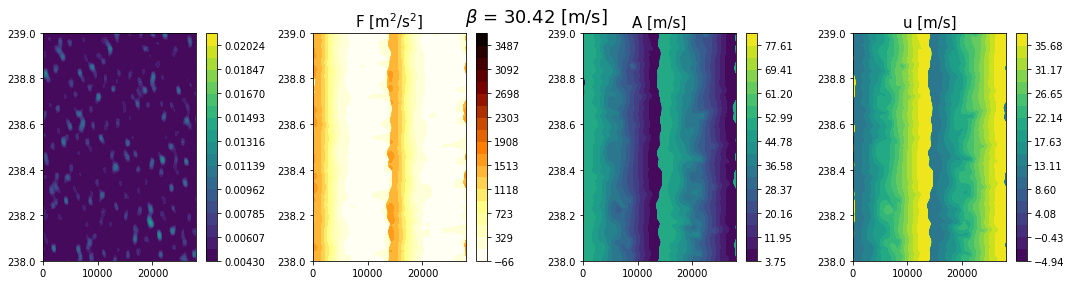

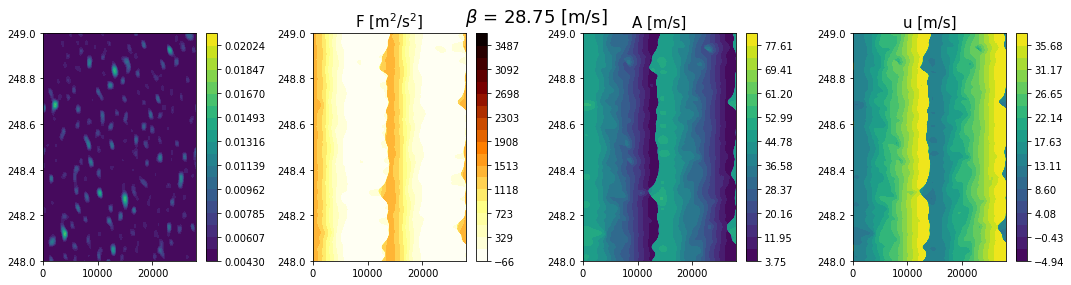

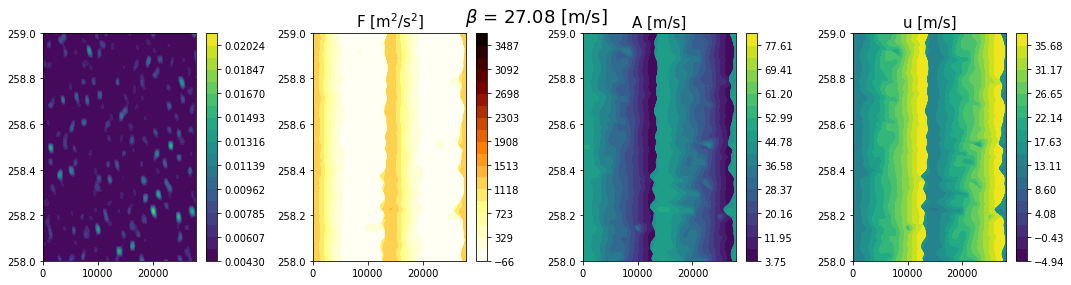

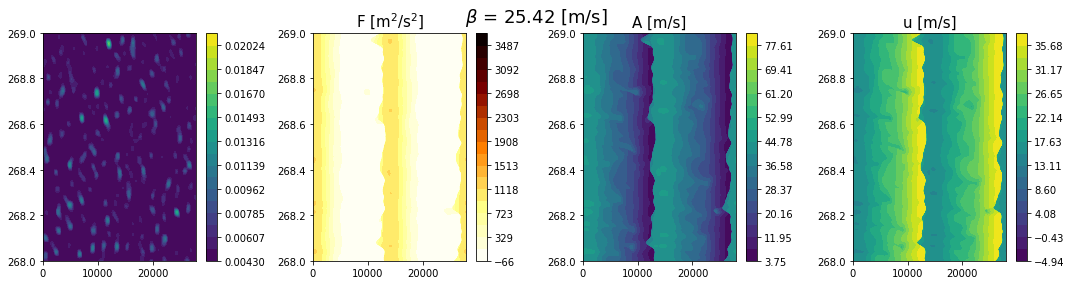

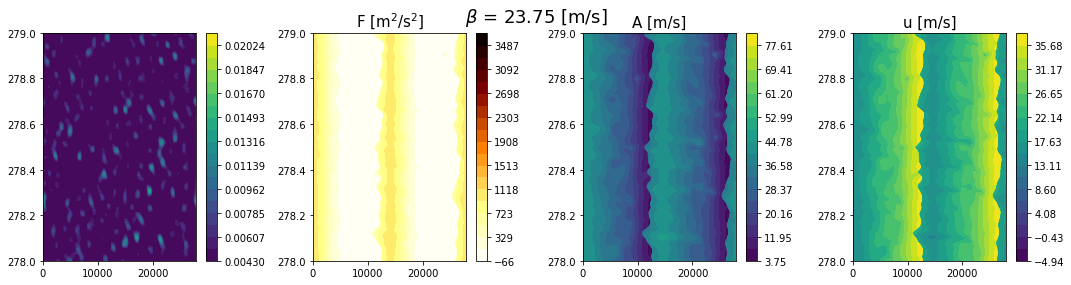

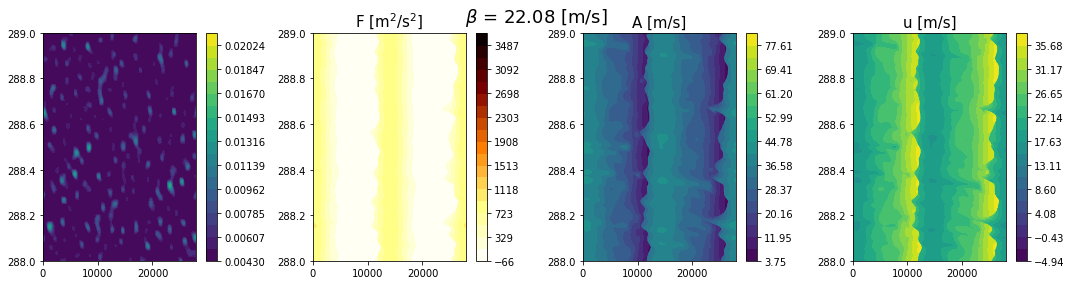

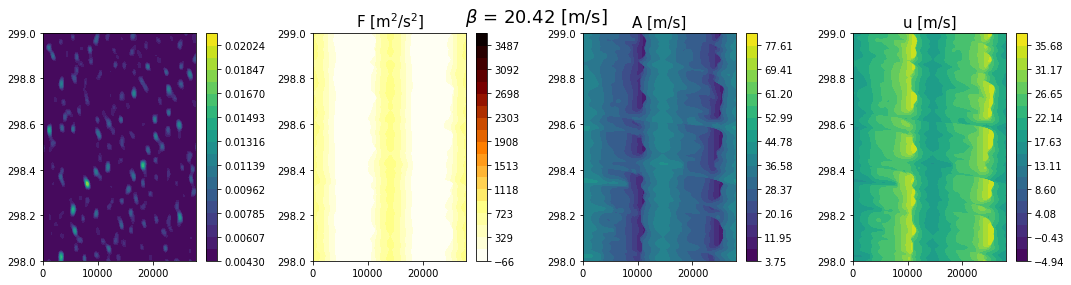

In [95]:
for i in np.arange(0,300,10):
    plot_each_decade1(Di=i,Df=i+10)

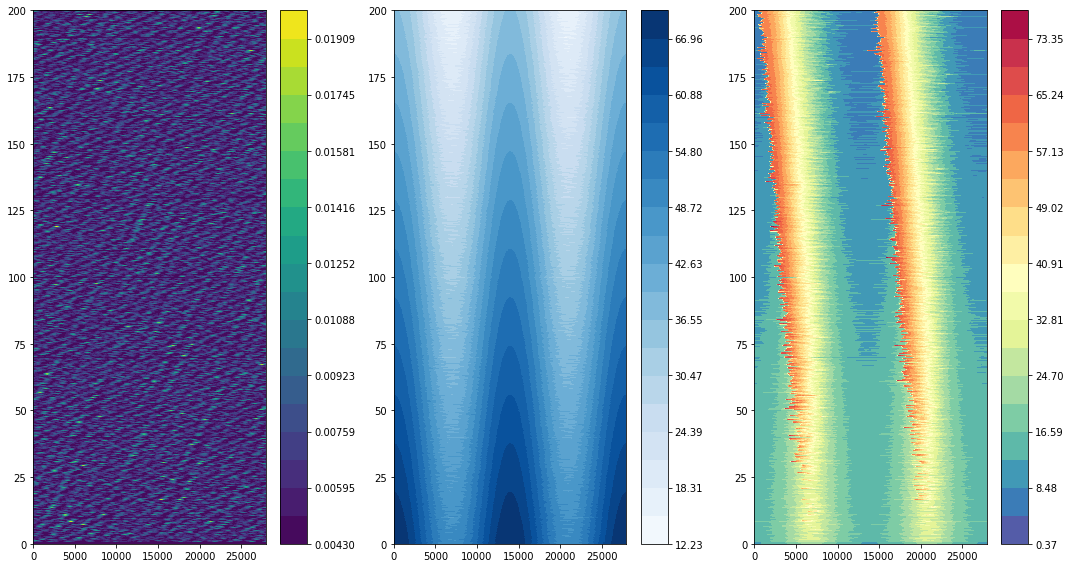

In [22]:
# D=200
# x = setup['grid/x'][:]
# # it0 = np.where(t/86400 > 0+260)[0][0]
# plt.figure(figsize=(15,8))

# plt.subplot(1,3,1)
# Smin=np.sqrt(np.min([eval("S%i"%i) for i in np.arange(0,D,10)]))
# Smax=np.sqrt(np.max([eval("S%i"%i) for i in np.arange(0,D,10)]))
# for i in np.arange(0,D,10):
#     plt.contourf(x/1000,eval("t%i"%i)/(86400*360), np.sqrt(eval("S%i"%i)), np.linspace(Smin, Smax, 20));    #plt.colorbar()
# # plt.yscale('log')
# plt.colorbar()

# plt.subplot(1,3,2)
# Cmin=(np.min([eval("C%i"%i) for i in np.arange(0,D,10)]))
# Cmax=(np.max([eval("C%i"%i) for i in np.arange(0,D,10)]))
# for i in np.arange(0,D,10):
#     plt.contourf(x/1000,eval("t%i"%i)/(86400*360), (eval("C%i"%i)), np.linspace(Cmin, Cmax, 20), cmap=plt.cm.Blues);    
# # plt.yscale('log')
# plt.colorbar()

# plt.subplot(1,3,3)
# Amin=(np.min([eval("Ahat%i"%i) for i in np.arange(0,D,10)]))
# Amax=(np.max([eval("Ahat%i"%i) for i in np.arange(0,D,10)]))
# for i in np.arange(0,D,10):
#     plt.contourf(x/1000,eval("t%i"%i)/(86400*360), (eval("Ahat%i"%i)), np.linspace(Amin, Amax, 20), cmap=plt.cm.Spectral_r); 
# plt.colorbar()
# # plt.yscale('log')
# plt.tight_layout()


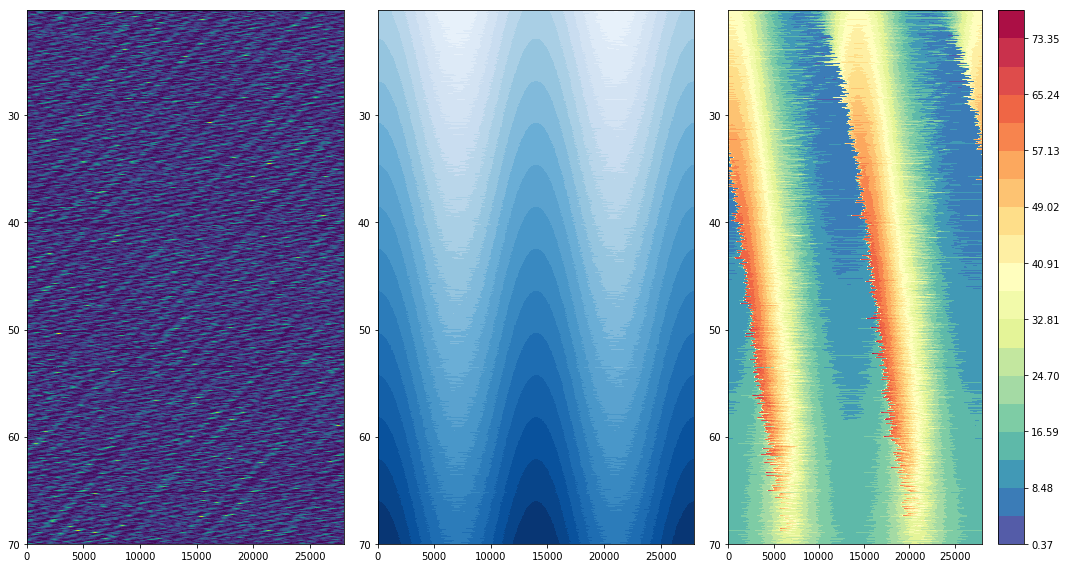

In [23]:
D=300
x = setup['grid/x'][:]
# it0 = np.where(t/86400 > 0+260)[0][0]
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
Smin=np.sqrt(np.min([eval("S%i"%i) for i in np.arange(0,D,10)]))
Smax=np.sqrt(np.max([eval("S%i"%i) for i in np.arange(0,D,10)]))
for i in np.arange(0,D,10):
    plt.contourf(x/1000,eval("beta%i"%i), np.sqrt(eval("S%i"%i)), np.linspace(Smin, Smax, 20));    #plt.colorbar()
plt.gca().invert_yaxis()
# plt.yscale('log')
# plt.colorbar()

plt.subplot(1,3,2)
Cmin=(np.min([eval("C%i"%i) for i in np.arange(0,D,10)]))
Cmax=(np.max([eval("C%i"%i) for i in np.arange(0,D,10)]))
for i in np.arange(0,D,10):
    plt.contourf(x/1000,eval("beta%i"%i), (eval("C%i"%i)), np.linspace(Cmin, Cmax, 20), cmap=plt.cm.Blues);    
plt.gca().invert_yaxis()
# plt.yscale('log')
# plt.colorbar()

plt.subplot(1,3,3)
Amin=(np.min([eval("Ahat%i"%i) for i in np.arange(0,D,10)]))
Amax=(np.max([eval("Ahat%i"%i) for i in np.arange(0,D,10)]))
for i in np.arange(0,D,10):
    plt.contourf(x/1000,eval("beta%i"%i), (eval("Ahat%i"%i)), np.linspace(Amin, Amax, 20), cmap=plt.cm.Spectral_r); 
plt.gca().invert_yaxis()
# plt.yscale('log')
plt.colorbar()
plt.tight_layout()


We can define an index `it0` corresponding to a time shortly before the forcing turns on, so we don't have to look at the long period of model spin-up.

In [31]:
from IPython.display import clear_output
def CC(decadal=0,year=0, field='F'):
    year_units = 360*4
    Field = 0
    t=[]; beta=[]
    for fni in fnis[decadal*year_units:(decadal+10)*year_units][360*4*(year):360*4*(year+1):4]:
        snap = h5py.File(fni)
        clear_output()
        t.append(snap['t'][()])
        beta.append(snap['beta'][()])
        try:
            Field = np.vstack([Field, snap[field][:]])
        except:
            Field = snap[field][:]
        print (("%1.2f"%(t[-1]/(86400*360))), end =" ") 
    t = np.array(t)
    beta=np.array(beta)    
    return Field, beta, t


In [32]:
ahat=0; f=1; s=2; c=3; beta=4; tt=5;

In [33]:
def plot_in_matrix(figs=plt.figure(figsize=(100,200)), decadal=0, year=0,  variable='speed'):
    
    titles=""
    if (variable=='speed'):
        Ahat, beta, t = CC(decadal,year, 'A') 
        u = (40)-alpha*(A0+ Ahat)
        Field = u 
        h = 2.5
        contour_range = np.arange(-5,35+h,h)
        cmap1 = plt.cm.Spectral
        titles = "%1.2f [m/s]"%(beta.mean())

    if (variable=='LWA'):
        Ahat, beta, t = CC(decadal,year, 'A') 
        A = (A0+ Ahat)
        Field = A 
        contour_range = np.arange(0,100,10)
        cmap1= 'viridis'
        titles = "%1.2f [m/s]"%(beta.mean())
        
    if (variable=='LWA flux'):
        Ahat, beta, t = CC(decadal,year, 'A')
        C, beta, t    = CC(decadal,year, 'C')
        F = (Ahat)*(C-Ahat)
        Field = F
        contour_range = np.arange(0,4000,300)
        cmap1 = plt.cm.afmhot_r
        titles = r"%1.2f [m^{2}/s^{2}]"%(beta.mean())
        
    if (variable=='Forcing'):
        S, beta, t = CC(decadal,year, 'S')
        Field = np.sqrt(S)  
        contour_range = np.linspace(0,0.0205,20)
        cmap1= 'viridis'
        titles = r"%1.2f [m^{2}/s^{2}]"%(beta.mean())
    
    x = setup['grid/x'][:]
    plt.subplot(20,10,(decadal+year+1) )    
    im = plt.contourf(x/1000, (t/(86400*360)), Field, contour_range, cmap=cmap1);    #plt.colorbar()
    plt.title(titles, fontsize=60, y=1.02)
    plt.tick_params(axis='both',length=10,width=5,labelsize=60)
    plt.tick_params(axis='x',length=10,width=5,labelsize=50)
    cbaxes = figs.add_axes([0.1, 1.01, 0.8, 0.01]) 
    if (decadal+year)==0:
        cbar=figs.colorbar(im, cax = cbaxes, orientation='horizontal')
        cbar.ax.tick_params(labelsize=70)
    plt.tight_layout()
# add_axes refer to [left, bottom, width, height]

<Figure size 7200x14400 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(100,200))
for year in range(0,10): 
    for decadal in range(0,200,10):
       plot_in_matrix(fig, decadal, year, variable='speed')

61.03 

Let's take a look at the forcing field using `matplotlib`'s `pcolormesh` function.

Text(0.5, 1.0, 'S')

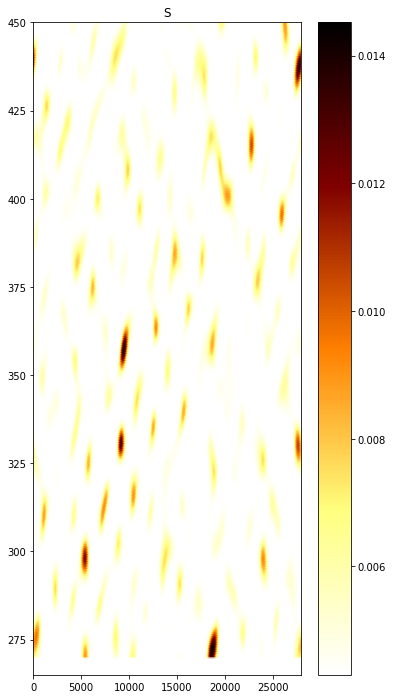

In [27]:
# Di=10
# Df=20
def plot_each_decade1(Di=10,Df=20, j=0, k=-1):
    x = setup['grid/x'][:]
    # it0 = np.where(t/86400 > 0+260)[0][0]
    plt.figure(figsize=(15,4))
    plt.subplot(1,4,1)
    Smin=np.sqrt(np.min([eval("S%i"%i) for i in np.arange(0,300,10)]))
    Smax=np.sqrt(np.max([eval("S%i"%i) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], np.sqrt(eval("S%i"%i))[j:k,:], np.linspace(Smin, Smax, 20));    #plt.colorbar()
    # plt.yscale('log')
#     plt.ylim(Di,Df)
    plt.colorbar()

    plt.subplot(1,4,2)
    plt.title(r"F [m$^2$/s$^2$]", fontsize=15)
    Fmin=(np.min([(eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    Fmax=(np.max([(eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], ((eval("Ahat%i"%i))* (eval("C%i"%i))-alpha*(eval("Ahat%i"%i)) )[j:k,:], np.linspace(Fmin, Fmax, 20), cmap=plt.cm.afmhot_r);    
    # plt.yscale('log')
#     plt.ylim(Di,Df)
    plt.colorbar()

    plt.subplot(1,4,3)
    plt.title("A [m/s]", fontsize=15)
    Amin=(np.min([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    Amax=(np.max([A0+(eval("Ahat%i"%i)) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (A0+(eval("Ahat%i"%i)))[j:k,:], np.linspace(Amin, Amax, 20), cmap='viridis'); 
    plt.colorbar()
#     plt.ylim(Di,Df)
    # plt.yscale('log')
    
    plt.subplot(1,4,4)
    plt.title("u [m/s]", fontsize=15)
    umin=(np.min([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
    umax=(np.max([(40)-alpha*(A0+(eval("Ahat%i"%i))) for i in np.arange(0,300,10)]))
    for i in np.arange(Di,Df,10):
        plt.contourf(x/1000,(eval("t%i"%i)/(86400*360))[j:k], (40-alpha*(A0+(eval("Ahat%i"%i))))[j:k,:], np.linspace(umin, umax, 20), cmap='viridis'); 
    plt.colorbar()
#     plt.ylim(Di,Df)
    # plt.yscale('log')
    
    plt.suptitle(r"$\beta$ = %1.2f [m/s]"%(eval("beta%i"%i).mean()), fontsize=18)
    plt.tight_layout()


## Counting patches

Here we'll introduce an algorithm for counting contiguous patches in a binary mask. We want to be able to identify _how many_ patches there are, not necessarily how large they are. So we can't simply integrate the mask (though that also has its uses). We could invoke a sophisticated cluster-finding algorithm or machine learning pattern, but that's definitely overkill.

So instead we implement a simple algorithm inspired by the classical computation problem, The Game of Life. We add a margin of ghost cells on each side, with an extra margin of `dx` and `dt`, using free boundaries on the time axis and periodic boundaries on the spatial axis. We define a box of width 2`dx` and height 2`dt`. We scan the box along each row, and at each step, if the central cell has a value of 1, consider how many other cells in the box have a value of 1 as opposed to 0. If any other cell in the box has a value of 1, the central cell is reset to 0. What this means is that when the box reaches the last cell in a patch, only one cell is left from that patch, and the box has only 1 non-zero cell. That means the last cell is left alone, and will count toward the total at the end.

Once the box has reached the end of the domain, we sum the value of the entire grid. Since a cell can have only a value of 0 or 1, and we now have 1 "black" cell per patch, this sum is therefore the number of patches. This algorithm has _O(N)_ complexity, specifically $N_xN_y(4d_xd_y-1)$ FLOPs, where $N=N_xN_y$.

In [28]:
def count_blocks(mask,dx,dt):
    dsh = mask.shape
    nt = dsh[0]
    nx = dsh[1]
    dmask = np.zeros(np.array(mask.shape)+[2*dt,2*dx])
    dmask[dt:-dt,dx:-dx] = mask[:,:]
    dmask[dt:-dt,0:dx] = mask[:,-dx:]
    dmask[dt:-dt,-dx:] = mask[:,0:dx]
    
    ict = 0
    for it in range(nt+dt,dt,-1):
        for ix in range(dx,nx+dx):
            if dmask[it,ix]==1:
                if np.sum(dmask[it-dt:it+dt,ix-dx:ix+dx])>1:
                    dmask[it,ix]=0
    
    ict = np.sum(dmask[dt:-dt,dx:-dx])
    return ict,dmask[dt:-dt,dx:-dx]

If we apply this to a mask of the forcing field, where a cell is 1 if the forcing is greater than a threshold value, and 0 otherwise, we can obtain a mask showing where and when the major forcings are. If we plot the coordinates of the cells identified as being representative of their patches as blue stars, we can see the algorithm does fairly well.

25.0


Text(0.5, 1.0, 'S Mask')

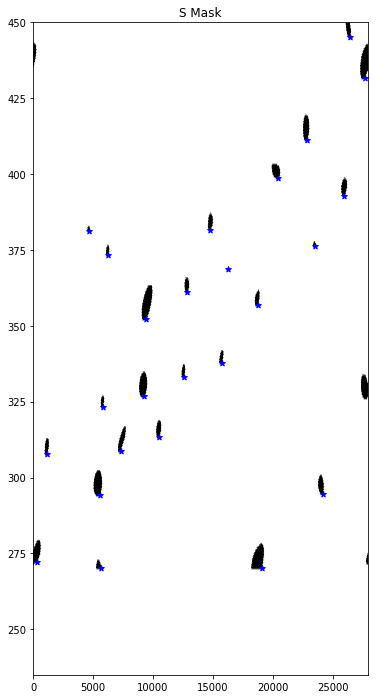

In [29]:
smask = (S[it0-100:]>0.6e-4)*1.0

sct,scmask = count_blocks(smask,5,5)
print(sct)
sts = t[it0-100:][np.where(scmask>0.5)[0]]/86400
sxs = x[np.where(scmask>0.5)[1]]/1e3
fig,ax=plt.subplots(figsize=(6.,12.))
plt.pcolormesh(x/1e3,t[it0-100:]/86400,smask,shading='Gouraud',cmap='Greys')
plt.scatter(sxs,sts,marker='*',color='b')
plt.ylim(235,450)
plt.title("S Mask")

Now let's actually take a look at some the output. First we'll look at the inputs: the forcing and the background.

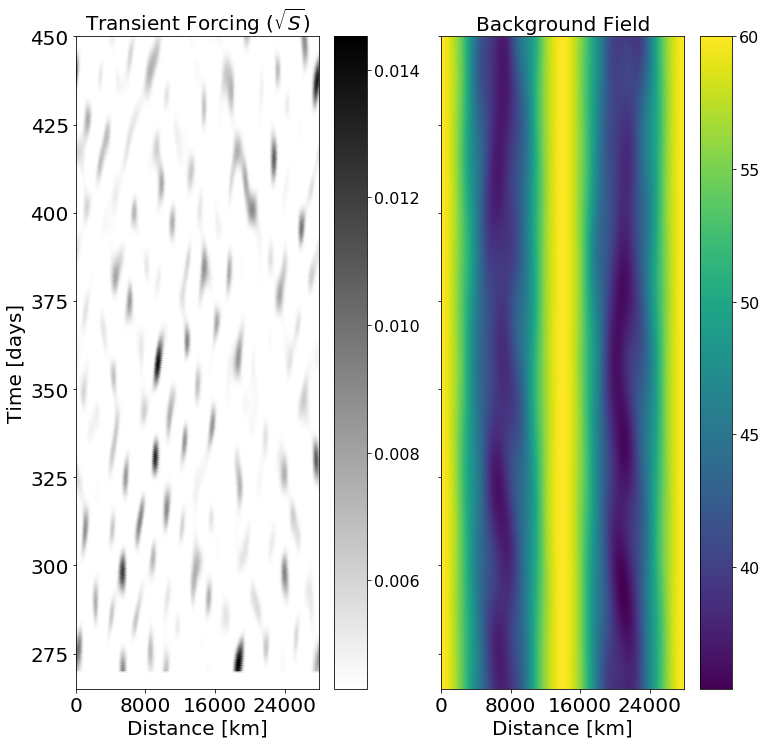

In [38]:
fig,axes=plt.subplots(1,2,figsize=(12.,12.),sharey=True)
im1=axes[0].pcolormesh(x/1e3,t[it0:]/86400,np.sqrt(S[it0:]),shading='Gouraud',cmap='gist_gray_r')
axes[0].set_ylim(265,450)
cbar=plt.colorbar(im1,ax=axes[0])#,label="Forcing Strength [m/s$^2$]")
cbar.ax.tick_params(labelsize=16)
axes[0].set_title(r"Transient Forcing $(\sqrt{S})$",fontsize=20)
im2=axes[1].pcolormesh(x/1e3,t[it0:]/86400,(C[it0:]),shading='Gouraud',cmap='viridis')
#plt.ylim(270,300)
#plt.xlim(7000,12000)
cbar=plt.colorbar(im2,ax=axes[1])#,label="Background Amplitude",ax=axes[1])
cbar.ax.tick_params(labelsize=16)
axes[1].set_title("Background Field",fontsize=20)
axes[0].set_ylabel("Time [days]",fontsize=20)
axes[0].set_xlabel("Distance [km]",fontsize=20)
axes[1].set_xlabel("Distance [km]",fontsize=20)
axes[0].tick_params(axis="x",labelsize=20)
axes[0].tick_params(axis="x",labelsize=20)
axes[0].set_xticks(np.arange(0,30000,8000))
axes[1].tick_params(axis="x",labelsize=20)
axes[1].set_xticks(np.arange(0,30000,8000))
axes[0].tick_params(axis="y",labelsize=20)

plt.savefig("figure_pdf/figure1.png")


You can see that this input produces sporadic blocking, some of it quite large and long-lasting. We can see this as large concentrations of LWA, as well as as sharp features in the flux.

Text(0.5, 1.0, 'F')

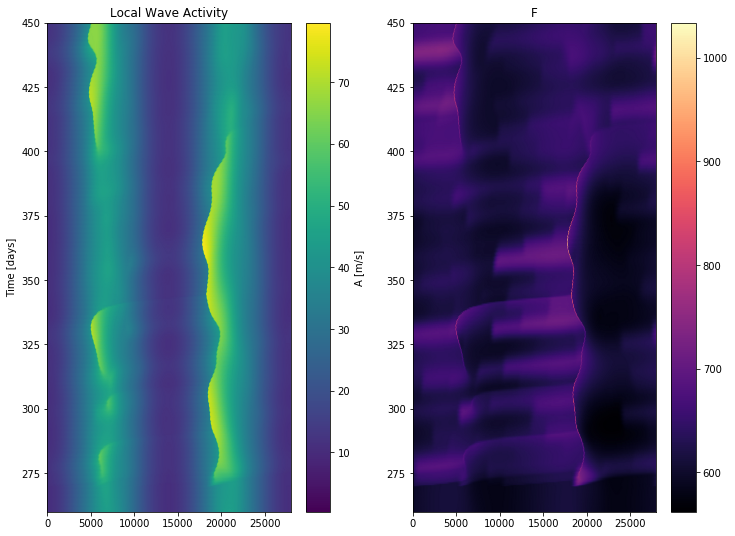

In [30]:
plt.figure(figsize=(12.,9))
plt.subplot(121)
plt.pcolormesh(x/1e3,t[:]/86400,(Ahat+model.A0[np.newaxis,:])[:],
               shading='Gouraud',cmap='viridis')
plt.ylim(260,450)
plt.ylabel("Time [days]")
plt.colorbar(label="A [m/s]")
plt.title("Local Wave Activity")

plt.subplot(122)
plt.pcolormesh(x/1e3,t[it0:]/86400,F[it0:],shading='Gouraud',cmap='magma')
plt.ylim(260,450)
plt.colorbar()
plt.title("F")
#plt.savefig("lwa_flux_random-cx-s.pdf",bbox_inches='tight')

We can get a sense for what's going on here by looking at the individual components of the equation being solved.

In [32]:
import matplotlib.colors as colors

Text(0.5, 1.0, '$-\\partial_xF$')

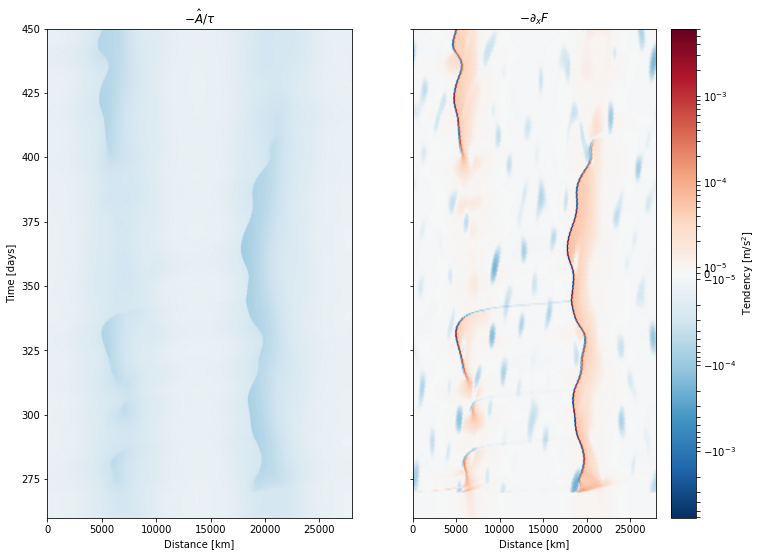

In [33]:

fterm = -np.gradient(F[:],x[1]-x[0],axis=1)
Dterm = 3.26e5*np.gradient(np.gradient(Ahat,x[1]-x[0],axis=1),x[1]-x[0],axis=1)
ahtau = -Ahat/(10.0*86400.0)
fmin = -np.amax(abs(fterm))
fmax = np.amax(abs(fterm))
ahmin = -np.amax(abs(ahtau))
ahmax = np.amax(abs(ahtau))
dmin = -np.amax(abs(Dterm))
dmax = np.amax(abs(Dterm))
smin = -np.amax(abs(S))
smax = np.amax(abs(S))
vmin = np.amin([fmin,ahmin,dmin,smin])
vmax = np.amax([fmax,ahmax,dmax,smax])

fig,axes=plt.subplots(1,2,figsize=(12.,9),sharey=True)
axes[0].pcolormesh(x/1e3,t[:]/86400,-(Ahat)/(10.0*86400.0),
                   shading='Gouraud',cmap='RdBu_r',
                   norm=colors.SymLogNorm(linthresh=1.0e-5, 
                                          linscale=0.1,vmin=vmin,vmax=vmax))
axes[0].set_ylim(260,450)
axes[0].set_title("$-\hat{A}/\\tau$")
axes[0].set_ylabel("Time [days]")

im=axes[1].pcolormesh(x/1e3,t[:]/86400,fterm,
                      shading='Gouraud',cmap='RdBu_r',
                      norm=colors.SymLogNorm(linthresh=1.0e-5, 
                                             linscale=0.1,vmin=vmin,vmax=vmax))
axes[1].set_ylim(260,450)
axes[1].set_xlabel("Distance [km]")
axes[0].set_xlabel("Distance [km]")
plt.colorbar(im,label="Tendency [m/s$^2$]",ax=axes[1])
axes[1].set_title("$-\partial_xF$")
#plt.savefig("eqn_components1.png",bbox_inches='tight')

The LWA decay is strongest during blocking events, which makes sense. Flux divergence is highest on the leading edges of blocking events, as well as in the tail when the remnant of a block is advected away. The flux convergence is highest downstream of the block. There's also localized divergence where forcing is injecting LWA. 

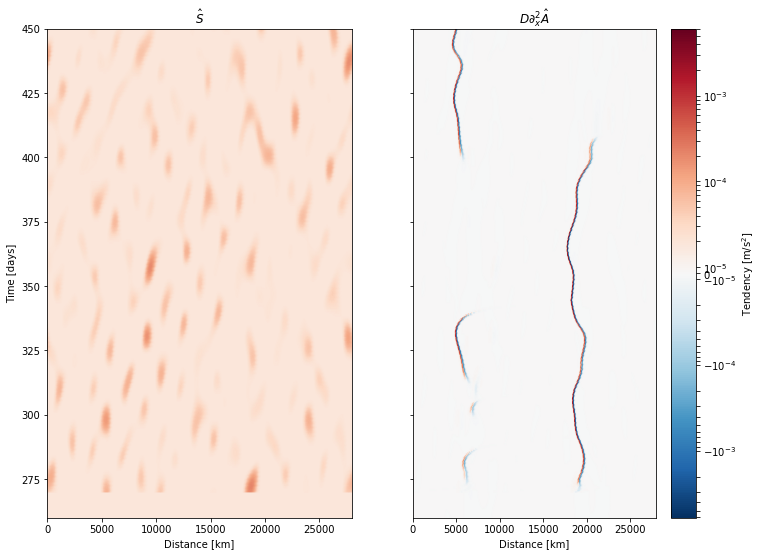

In [34]:
fig,axes = plt.subplots(1,2,figsize=(12.,9),sharey=True)
im=axes[0].pcolormesh(x/1e3,t[:]/86400,S,shading='Gouraud',cmap='RdBu_r',
                      norm=colors.SymLogNorm(linthresh=1.0e-5, 
                                             linscale=0.1,vmin=vmin,vmax=vmax))
axes[0].set_ylim(260,450)
axes[0].set_ylabel("Time [days]")
axes[0].set_title("$\hat{S}$")
axes[0].set_xlabel("Distance [km]")
axes[1].set_xlabel("Distance [km]")
axes[1].pcolormesh(x/1e3,t[:]/86400,Dterm,shading='Gouraud',cmap='RdBu_r',
                   norm=colors.SymLogNorm(linthresh=1.0e-5, 
                                          linscale=0.1,vmin=vmin,vmax=vmax))
axes[1].set_title("$D\partial_x^2\hat{A}$")
plt.colorbar(im,label="Tendency [m/s$^2$]",ax=axes[1])
#plt.savefig("eqn_components2.png",bbox_inches='tight')

The diffusion term is effectively negligible except for on the leading edges of blocks, where it acts to smooth and avoid numerical problems where the shock forms.

Now of course, fundamentally a blocking event is characterized by a slowdown in the mean eastward flow.

In [35]:
ua = 40-cond.alpha*(Ahat+model.A0[np.newaxis,:])

In [37]:
np.linspace(0,30000,1)

array([0.])

Here large amounts of LWA correspond to large slowdowns or even reversals in mean eastward flow. Note that, in particular, the leading edge is characterized by extremely sharp changes in flow speed. This is the leading edge of the traffic jam.


It's also fun to plot some particle trajectories.

In [38]:
def trajectory_ua(t0,xx,times,ua,L):
    traj = []
    ttimes = []
    posx = 0
    it0 = np.where(times>=t0)[0]
    if len(it0)>0:
        it0 = it0[0]
    ttimes.append(times[it0])
    traj.append(posx)
    while posx < L and ttimes[-1]<times[-1]:
        dt = times[it0+1]-times[it0]
        vx = np.interp(posx,xx,0.5*(ua[it0,:]+ua[it0+1,:])) #Leapfrog
        posx += vx*dt
        ttimes.append(ttimes[-1]+dt)
        traj.append(posx)
        it0+=1
    return np.array(ttimes),np.array(traj)

(0, 28000)

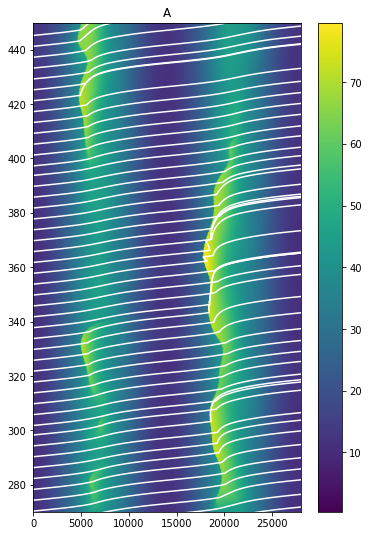

In [39]:
plt.figure(figsize=(6.,9))
plt.pcolormesh(x/1e3,t[:]/86400,(Ahat+model.A0[np.newaxis,:])[:],
               shading='Gouraud',cmap='viridis')
plt.ylim(150,450)
plt.colorbar()
traj = np.zeros((40,x.shape[0]))
t0s = np.linspace(250*86400.0,445*86400.0,num=50)
for nt in range(0,50):
    tps,xps = trajectory_ua(t0s[nt],x,t,ua,28000.0e3)
    plt.plot(xps/1e3,tps/86400,color='w')
plt.title("A")
plt.ylim(270,450)
plt.xlim(0,28000)
#plt.savefig("lwa_flux_random-cx-s.pdf",bbox_inches='tight')

Amazing! Look at that flow reversal in the first block! This is even more clear if we only plot the trajectories.

(0, 28000)

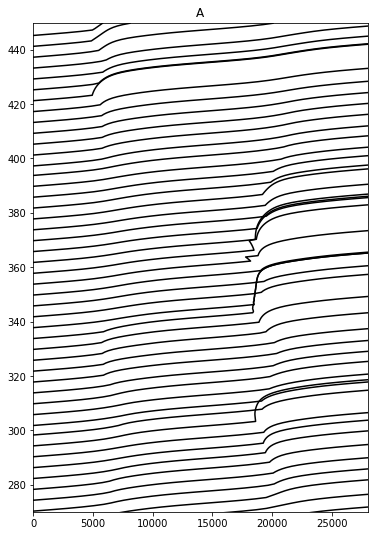

In [40]:
plt.figure(figsize=(6.,9))
traj = np.zeros((40,x.shape[0]))
t0s = np.linspace(250*86400.0,445*86400.0,num=50)
for nt in range(0,50):
    tps,xps = trajectory_ua(t0s[nt],x,t,ua,28000.0e3)
    plt.plot(xps/1e3,tps/86400,color='k')
plt.title("A")
plt.ylim(270,450)
plt.xlim(0,28000)
#plt.savefig("lwa_flux_random-cx-s.pdf",bbox_inches='tight')

Noboru proposed that flux saturation might be a good proxy for measuring blocking onset. Let's take a look at that.

In [41]:
gamma = 4*cond.alpha*F/C**2

The flux saturation $\Gamma(x,t)$ is defined as $$\Gamma(x,t) = \frac{4\alpha F(x,t)}{C^2(x)}.$$

0.9999999999947748


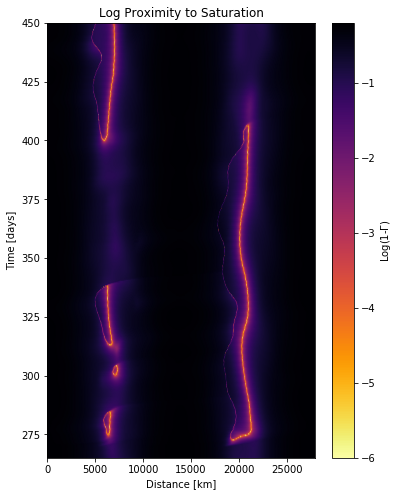

In [42]:
plt.figure(figsize=(6.,8))
im=plt.pcolormesh(x/1e3,t[it0:]/86400,
                  np.log10(np.maximum(1.0-(gamma)[it0:],1.0e-6)),
                  shading='Gouraud',cmap='inferno_r')
plt.colorbar(im,label="Log(1-$\Gamma$)")
#plt.contour(x/1e3,t[it0:]/86400,(gamma)[it0:],0.99999,colors='g')
plt.ylim(265,450)
plt.title("Log Proximity to Saturation")
plt.ylabel("Time [days]")
plt.xlabel("Distance [km]")
print(gamma.max())
#plt.savefig("gamma.png",bbox_inches='tight')

# 2c

Rather than plotting the saturation itself, we instead plot $\log_{10}(1-\Gamma)$. This means we can see the asymptotic approach to $\Gamma=1$, and actually see that the transition is rather sharp, and makes it clear that blocks are outlined by regions of flux saturation, with the highest saturation actually downstream of the area of strongest slowdown.

This becomes then a tempting mask for identifying blocks.

In [58]:
masked = gamma.copy()
masked[np.where(gamma<0.99999)]=0
masked[np.where(gamma>=0.99999)]=1

Text(0.5, 1.0, 'Flux Saturated Yes/No')

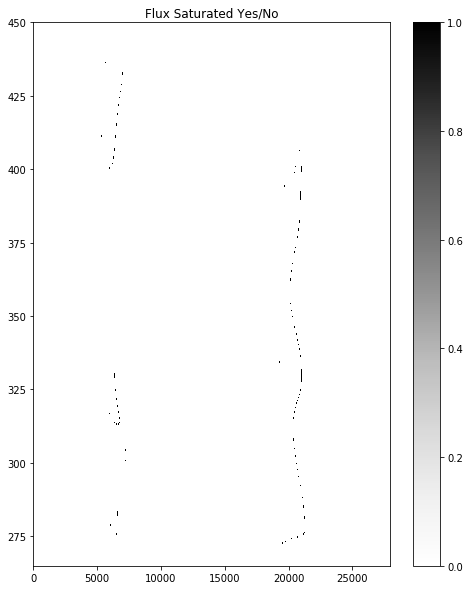

In [44]:

plt.figure(figsize=(8.,10))
plt.pcolormesh(x/1e3,t[it0:]/86400,(masked)[it0:],cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
plt.title("Flux Saturated Yes/No")

Here we see however that this is actually quite spotty, and therefore perhaps not ideal. We can instead consider a few other measures: the time tendency of $A$, and the absolute value of the flux divergence/convergence.

Text(0.5, 1.0, '$|\\partial_t A|$')

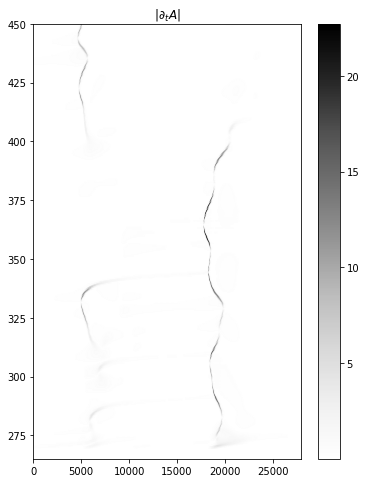

In [59]:
plt.figure(figsize=(6.,8))
plt.pcolormesh(x/1e3,t[it0:]/86400,
               abs(np.gradient((Ahat+model.A0[np.newaxis,:])[it0:],axis=0)),
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
plt.title("$|\partial_t A|$")

Text(0.5, 1.0, '$|\\partial_x F|$')

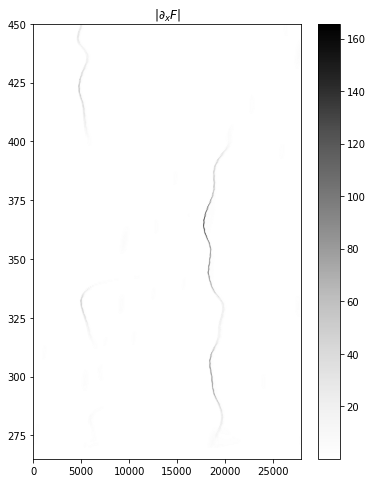

In [60]:
plt.figure(figsize=(6.,8))
plt.pcolormesh(x/1e3,t[it0:]/86400,abs(np.gradient(F[it0:],axis=1)),
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
plt.title("$|\partial_x F|$")

These trace the leading edges, but by playing with the parameters we can find examples of false positives and false negatives.

Another measure that may be more useful is actually much more direct: the local flow gradient. This is a direct probe of sharp slowdowns.

Text(0.5, 1.0, '$|\\partial_x u|$')

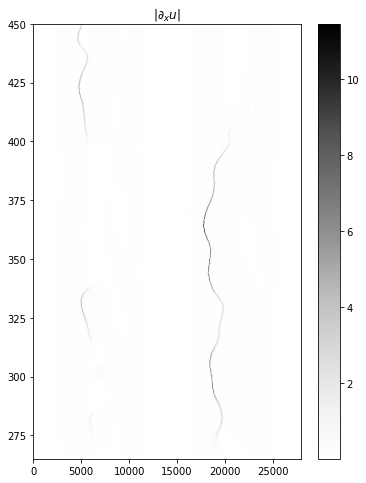

In [61]:
plt.figure(figsize=(6.,8))
plt.pcolormesh(x/1e3,t[it0:]/86400,
               abs(np.gradient(ua[it0:],axis=1)),
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
plt.title("$|\partial_x u|$")

To use these quantities as masks, we can compute the signficance of the metric relative to the background by computing its difference from the mean relative to the standard deviation.

Text(0.5, 1.0, '$\\left(\\partial_x F - <\\partial_x F>\\right)/\\sigma_{\\partial_x F}$')

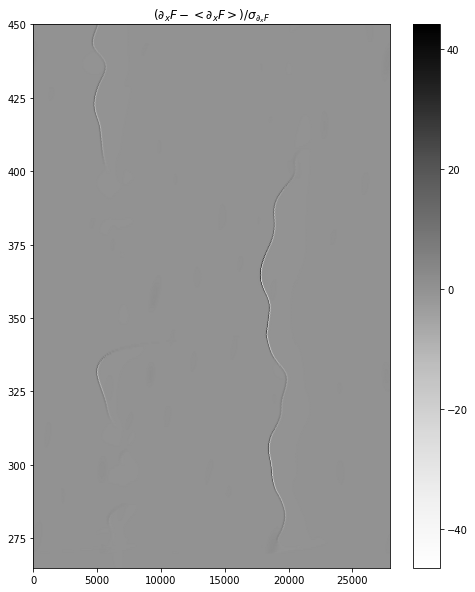

In [62]:
plt.figure(figsize=(8.,10))
grad = (np.gradient(F[it0:],axis=1))
plt.pcolormesh(x/1e3,t[it0:]/86400,
               ((grad-np.mean(grad))/np.std(grad)),
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
#plt.xlim(14000,24000)
plt.title("$\left(\partial_x F - <\partial_x F>"+
          "\\right)/\sigma_{\partial_x F}$")

Text(0.5, 1.0, '$\\left(<\\partial_x u> - \\partial_xu\\right)/\\sigma_{\\partial_x u}$')

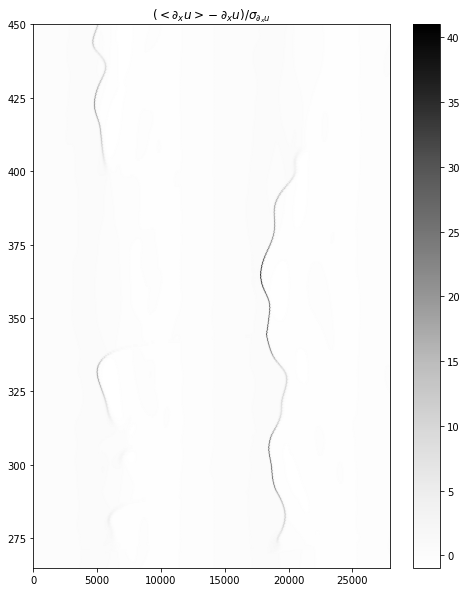

In [63]:
plt.figure(figsize=(8.,10))
ugrad = -(np.gradient(ua[it0:],axis=1))
plt.pcolormesh(x/1e3,t[it0:]/86400,
               ((ugrad-np.mean(ugrad))/np.std(ugrad)),
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
#plt.xlim(14000,24000)
plt.title("$\left(<\partial_x u> - \partial_xu"+
          "\\right)/\sigma_{\partial_x u}$")

Here it is clear that we can identify these sharp features with a fair bit of confidence. Let's mask the flux divergence to a certain significance threshold.

Text(0.5, 1.0, '$\\left(\\partial_x F - <\\partial_x F>\\right)/\\sigma_{\\partial_x F}$ > 10 Binary Flag')

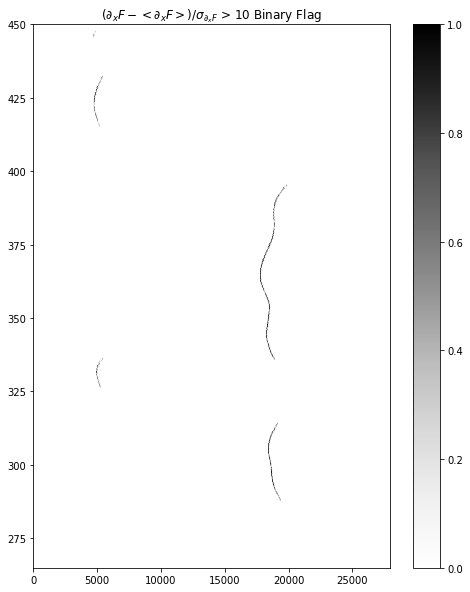

In [64]:
plt.figure(figsize=(8.,10))
thresh = 10
grad = (np.gradient(F[it0:],axis=1))
plt.pcolormesh(x/1e3,t[it0:]/86400,
               ((grad-np.mean(grad))/np.std(grad) > thresh)*1.0,
               shading='Gouraud',cmap='Greys')
plt.colorbar()
plt.ylim(265,450)
#plt.xlim(14000,24000)
plt.title("$\left(\partial_x F - <\partial_x F>\\right)/"+
          "\sigma_{\partial_x F}$ > %d Binary Flag"%thresh)

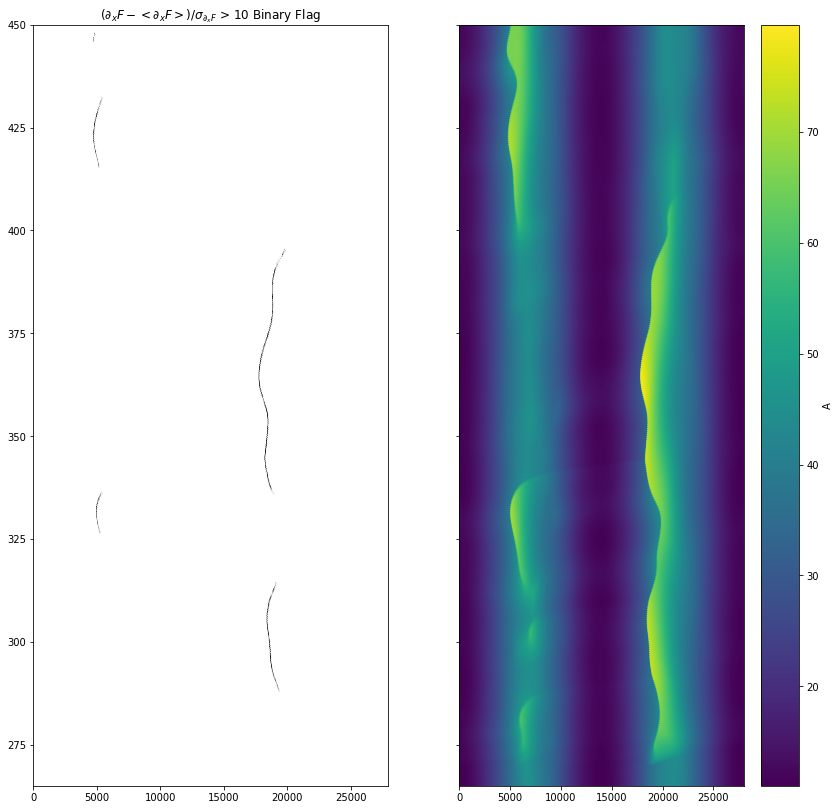

In [65]:
fix,axes=plt.subplots(1,2,figsize=(14,14),sharey=True)

im1=axes[0].pcolormesh(x/1e3,t[it0:]/86400,
                       ((grad-np.mean(grad))/np.std(grad) > thresh)*1.0,
                       shading='Gouraud',cmap='Greys')
axes[0].set_ylim(265,450)
axes[0].set_title("$\left(\partial_x F - <\partial_x F>\\right)"+
                  "/\sigma_{\partial_x F}$ > %d Binary Flag"%thresh)
im2 = axes[1].pcolormesh(x/1e3,t[it0:]/86400,
                         (Ahat+model.A0[np.newaxis,:])[it0:],
                         shading='Gouraud',cmap='viridis')
axes[1].set_ylim(265,450)
plt.colorbar(im2,ax=axes[1],label="A")

What is this?! At 10 sigma significance, one of our blocks vanishes! Let's look at the flow gradient.

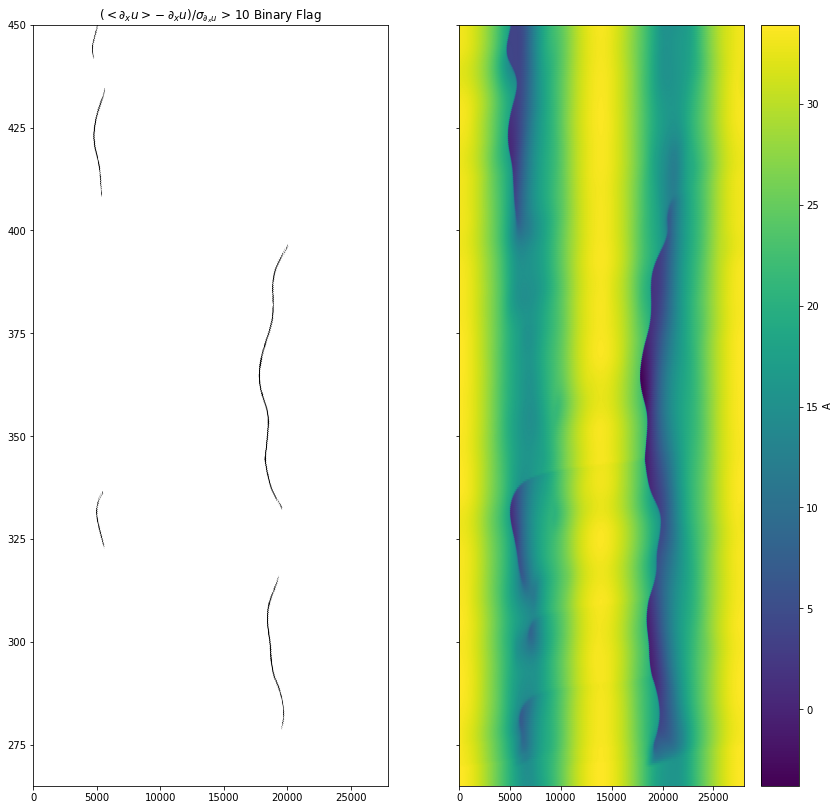

In [66]:
fix,axes=plt.subplots(1,2,figsize=(14,14),sharey=True)
threshu = 10
im1=axes[0].pcolormesh(x/1e3,t[it0:]/86400,
                       ((ugrad-np.mean(ugrad))/np.std(ugrad) > threshu)*1.0,
                       shading='Gouraud',cmap='Greys')
axes[0].set_ylim(265,450)
axes[0].set_title("$\left(<\partial_x u> - \partial_xu\\right)/"+
                  "\sigma_{\partial_x u}$ > %d Binary Flag"%threshu)
im2 = axes[1].pcolormesh(x/1e3,t[it0:]/86400,ua[it0:],
                         shading='Gouraud',cmap='viridis')
axes[1].set_ylim(265,450)
plt.colorbar(im2,ax=axes[1],label="A")

In this metric, we __do__ see each block at 10 sigma significance.

In [67]:
umask = ((ugrad - np.mean(ugrad))/np.std(ugrad) > threshu)*1.0
uct,umask = count_blocks(umask,80,10)
print(uct)
uts = t[it0:][np.where(umask>0.5)[0]]/86400
uxs = x[np.where(umask>0.5)[1]]/1e3

5.0


When we use our `count_blocks()` algorithm, it identifies 7 blocks. That's not bad. Let's plot where those are, with blue stars over the mask and red stars over the eastward flow map.

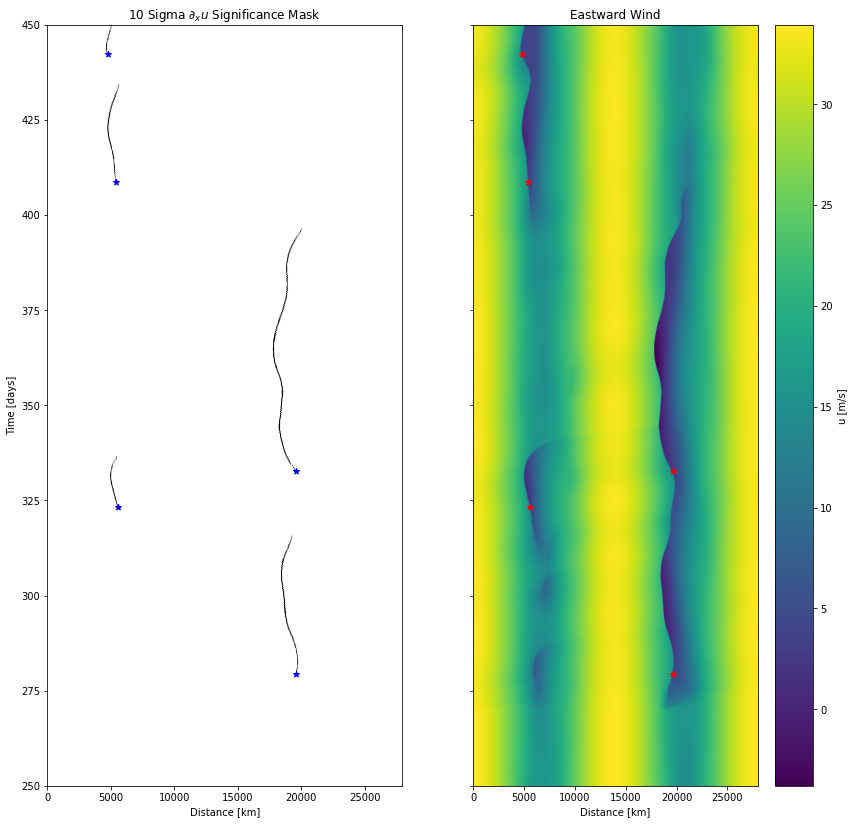

In [68]:
fix,axes=plt.subplots(1,2,figsize=(14,14),sharey=True)

im1=axes[0].pcolormesh(x/1e3,t[it0:]/86400,
                       ((ugrad-np.mean(ugrad))/np.std(ugrad) > threshu)*1.0,
                       shading='Gouraud',cmap='Greys')
axes[0].set_ylim(250,450)
axes[0].set_title("%d Sigma $\partial_x u$ Significance Mask"%threshu)
im2 = axes[1].pcolormesh(x/1e3,t[it0-50:]/86400,ua[it0-50:],
                         shading='Gouraud',cmap='viridis')
axes[0].scatter(uxs,uts,s=40,marker='*',color='b')
axes[1].scatter(uxs,uts,s=40,marker='*',color='r')
axes[1].set_ylim(250,450)
axes[0].set_ylabel("Time [days]")
axes[0].set_xlabel("Distance [km]")
axes[1].set_xlabel("Distance [km]")
axes[1].set_title("Eastward Wind")
plt.colorbar(im2,ax=axes[1],label="u [m/s]")
#plt.savefig("blockidentification.png",bbox_inches='tight')


# 2d

That's pretty good! Now let's look at LWA and forcing side-by-side. We'll see here that there isn't always an obvious correlation between individual forcing events and blocks--it's a matter of built-up flux!

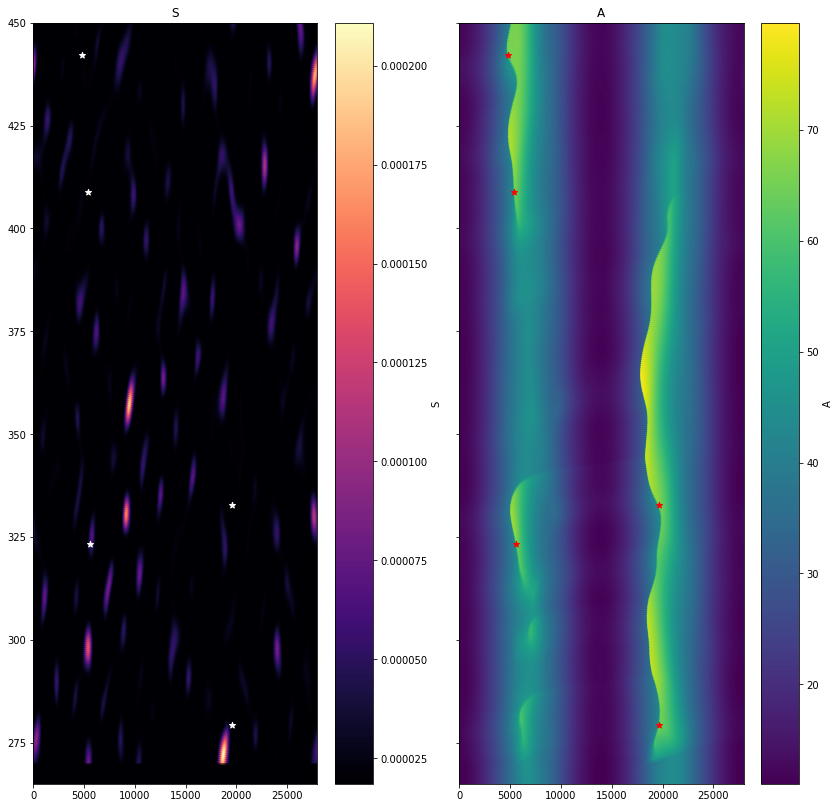

In [69]:
fix,axes=plt.subplots(1,2,figsize=(14,14),sharey=True)

im1=axes[0].pcolormesh(x/1e3,t[it0:]/86400,S[it0:],
                       shading='Gouraud',cmap='magma')
axes[0].scatter(uxs,uts,s=40,marker='*',color='w')
axes[0].set_ylim(265,450)
axes[0].set_title("S")
#plt.legend(loc='best')
im2 = axes[1].pcolormesh(x/1e3,t[it0:]/86400,
                         (Ahat+model.A0[np.newaxis,:])[it0:],
                         shading='Gouraud',cmap='viridis')
axes[1].scatter(uxs,uts,s=40,marker='*',color='r')
axes[1].set_ylim(265,450)
axes[1].set_title("A")
plt.colorbar(im1,ax=axes[0],label="S")
plt.colorbar(im2,ax=axes[1],label="A")

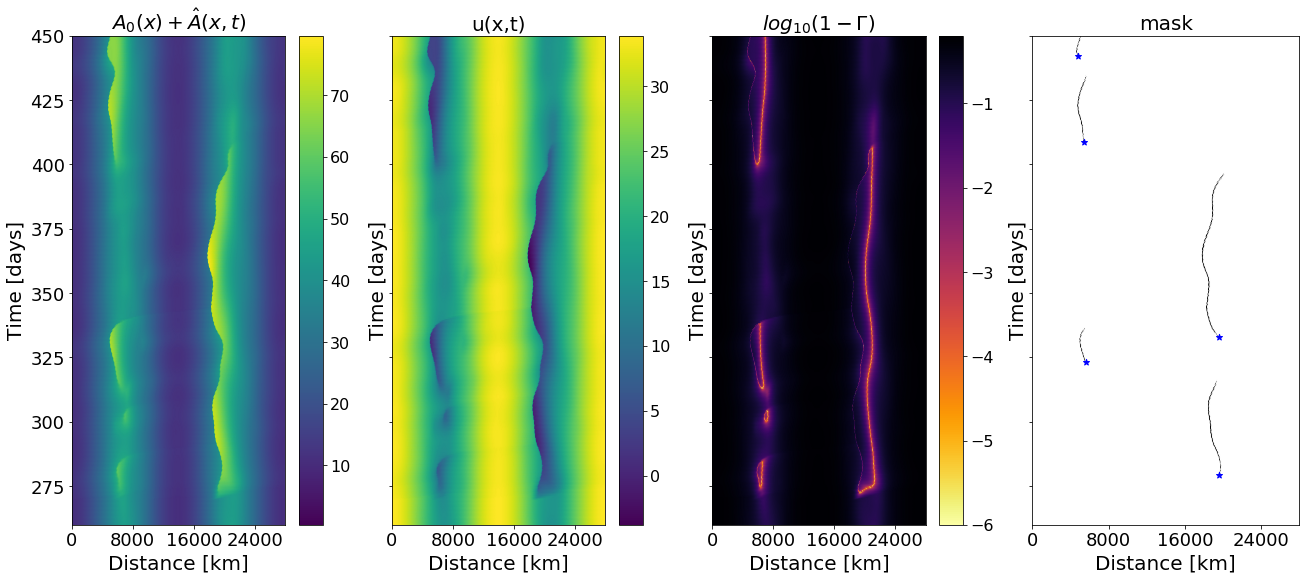

In [70]:
fig,axes=plt.subplots(1,4,figsize=(22.,9),sharey=True)

im=axes[0].pcolormesh(x/1e3,t[:]/86400,(Ahat+model.A0[np.newaxis,:])[:],
                      shading='Gouraud',cmap='viridis')
axes[0].set_ylim(260,450)
axes[0].set_ylabel("Time [days]",fontsize=20)
#plt.colorbar(im)#,label="A [m/s]",ax=axes[0])
cbar=plt.colorbar(im,ax=axes[0])
cbar.ax.tick_params(labelsize=16)
# axes[0].set_title("Local Wave Activity",fontsize=20)
axes[0].set_title(r"$A_{0}(x)+\hat{A}(x,t)$",fontsize=20)
axes[0].set_xlabel("Distance [km]",fontsize=20)
axes[0].tick_params(axis="x",labelsize=18)
axes[0].tick_params(axis="y",labelsize=18)
axes[0].set_xticks(np.arange(0,30000,8000))

im=axes[1].pcolormesh(x/1e3,t[it0:]/86400,(ua)[it0:],shading='Gouraud',
                      cmap='viridis')
cbar=plt.colorbar(im,ax=axes[1])
cbar.ax.tick_params(labelsize=16)
axes[1].set_ylim(260,450)
axes[1].set_ylabel("Time [days]",fontsize=20)
axes[1].set_xlabel("Distance [km]",fontsize=20)
axes[1].set_title("u(x,t)",fontsize=20)
axes[1].tick_params(axis="x",labelsize=18)
axes[1].set_xticks(np.arange(0,30000,8000))



im=axes[2].pcolormesh(x/1e3,t[it0:]/86400,
                  np.log10(np.maximum(1.0-(gamma)[it0:],1.0e-6)),
                  shading='Gouraud',cmap='inferno_r')
cbar=plt.colorbar(im,ax=axes[2])
cbar.ax.tick_params(labelsize=16)
axes[2].set_ylim(260,450)
axes[2].set_ylabel("Time [days]",fontsize=20)
axes[2].set_xlabel("Distance [km]",fontsize=20)
axes[2].set_title(r"$log_{10}(1-\Gamma)$",fontsize=20)
axes[2].tick_params(axis="x",labelsize=18)
axes[2].set_xticks(np.arange(0,30000,8000))


im=axes[3].pcolormesh(x/1e3,t[it0:]/86400,
                       ((ugrad-np.mean(ugrad))/np.std(ugrad) > threshu)*1.0,
                       shading='Gouraud',cmap='Greys')
axes[3].scatter(uxs,uts,s=40,marker='*',color='b')
# cbar=plt.colorbar(im,ax=axes[3])
# cbar.ax.tick_params(labelsize=16)
axes[3].set_ylim(260,450)
axes[3].set_ylabel("Time [days]",fontsize=20)
axes[3].set_xlabel("Distance [km]",fontsize=20)
axes[3].set_title("mask",fontsize=20)
axes[3].tick_params(axis="x",labelsize=18)
axes[3].set_xticks(np.arange(0,30000,8000))

plt.savefig("figure_pdf/figure2.png")

# 2a,b

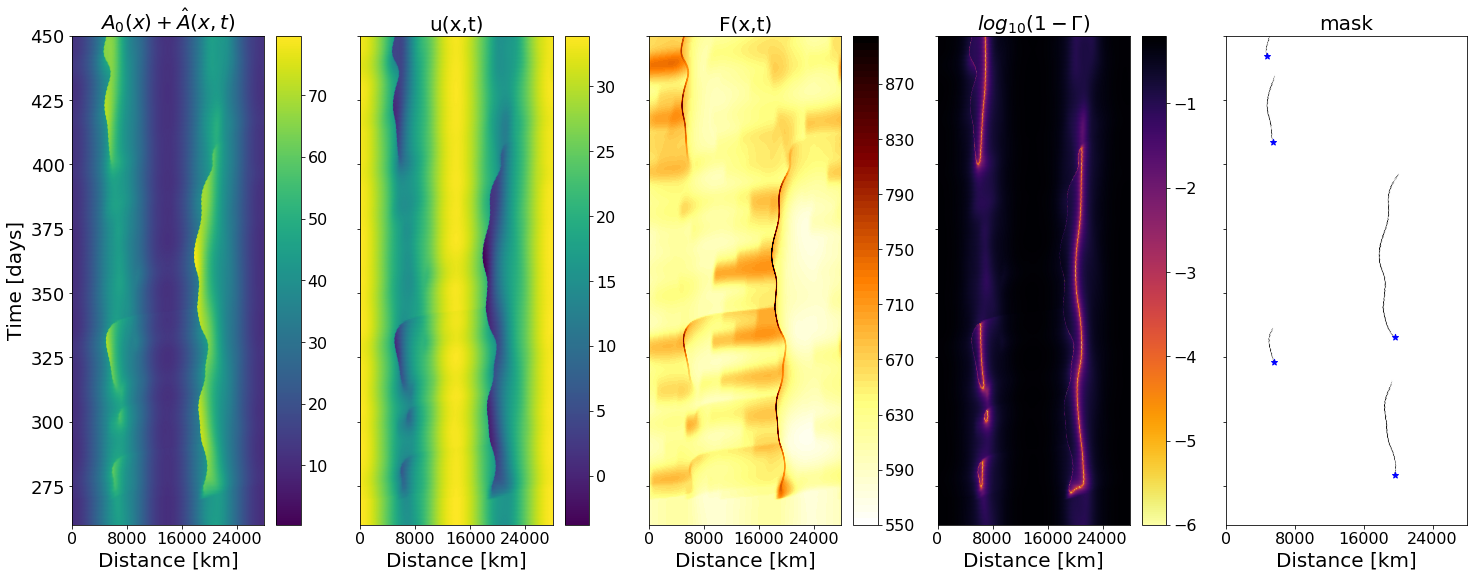

In [115]:
fig,axes=plt.subplots(1,5,figsize=(25.,9),sharey=True)

im=axes[0].pcolormesh(x/1e3,t[:]/86400,(Ahat+model.A0[np.newaxis,:])[:],
                      shading='Gouraud',cmap='viridis')
axes[0].set_ylim(260,450)
axes[0].set_ylabel("Time [days]",fontsize=20)
#plt.colorbar(im)#,label="A [m/s]",ax=axes[0])
cbar=plt.colorbar(im,ax=axes[0])
cbar.ax.tick_params(labelsize=16)
# axes[0].set_title("Local Wave Activity",fontsize=20)
axes[0].set_title(r"$A_{0}(x)+\hat{A}(x,t)$",fontsize=20)
axes[0].set_xlabel("Distance [km]",fontsize=20)
axes[0].tick_params(axis="x",labelsize=16)
axes[0].tick_params(axis="y",labelsize=18)
axes[0].set_xticks(np.arange(0,30000,8000))

im=axes[1].pcolormesh(x/1e3,t[it0:]/86400,(ua)[it0:],shading='Gouraud',
                      cmap='viridis')
cbar=plt.colorbar(im,ax=axes[1])
cbar.ax.tick_params(labelsize=16)
axes[1].set_ylim(260,450)
# axes[1].set_ylabel("Time [days]",fontsize=20)
axes[1].set_xlabel("Distance [km]",fontsize=20)
axes[1].set_title("u(x,t)",fontsize=20)
axes[1].tick_params(axis="x",labelsize=16)
axes[1].set_xticks(np.arange(0,30000,8000))



im=axes[3].pcolormesh(x/1e3,t[it0:]/86400,
                  np.log10(np.maximum(1.0-(gamma)[it0:],1.0e-6)),
                  shading='Gouraud',cmap='inferno_r')
cbar=plt.colorbar(im,ax=axes[3])
cbar.ax.tick_params(labelsize=16)
axes[3].set_ylim(260,450)
# axes[3].set_ylabel("Time [days]",fontsize=20)
axes[3].set_xlabel("Distance [km]",fontsize=20)
axes[3].set_title(r"$log_{10}(1-\Gamma)$",fontsize=20)
axes[3].tick_params(axis="x",labelsize=16)
axes[3].set_xticks(np.arange(0,30000,8000))



im=axes[2].contourf(x/1e3,t[it0:]/86400,F[it0:],np.arange(550,910,5),cmap='afmhot_r')
cbar=plt.colorbar(im,ax=axes[2])
cbar.ax.tick_params(labelsize=16)
axes[2].set_ylim(260,450)
# axes[2].set_ylabel("Time [days]",fontsize=20)
axes[2].set_xlabel("Distance [km]",fontsize=20)
axes[2].set_title("F(x,t)",fontsize=20)
axes[2].tick_params(axis="x",labelsize=16)
axes[2].set_xticks(np.arange(0,30000,8000))



im=axes[4].pcolormesh(x/1e3,t[it0:]/86400,
                       ((ugrad-np.mean(ugrad))/np.std(ugrad) > threshu)*1.0,
                       shading='Gouraud',cmap='Greys')
axes[4].scatter(uxs,uts,s=40,marker='*',color='b')
# cbar=plt.colorbar(im,ax=axes[3])
# cbar.ax.tick_params(labelsize=16)
axes[4].set_ylim(260,450)
# axes[3].set_ylabel("Time [days]",fontsize=20)
axes[4].set_xlabel("Distance [km]",fontsize=20)
axes[4].set_title("mask",fontsize=20)
axes[4].tick_params(axis="x",labelsize=16)
axes[4].set_xticks(np.arange(0,30000,8000))

plt.savefig("figure_pdf/figure3.png")

# 2a,b

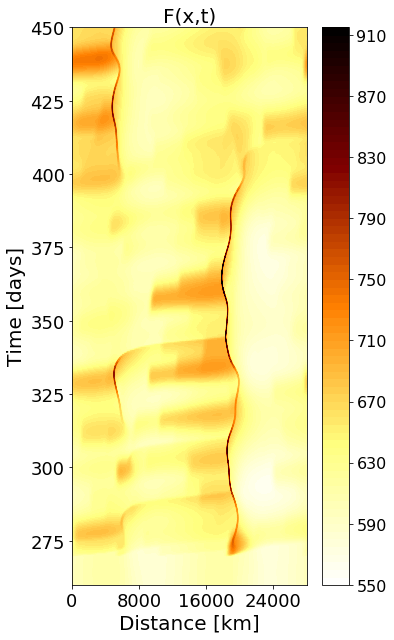

In [129]:

plt.figure(figsize=(5.5,9))
im=plt.contourf(x/1e3,t[it0:]/86400,F[it0:],np.arange(550,920,5),cmap='afmhot_r')
cbar=plt.colorbar(im)
cbar.ax.tick_params(labelsize=16)
plt.ylim(260,450)
plt.xlabel('Distance [km]', fontsize=20)
plt.xticks(np.arange(0,30000,8000), fontsize=18)
plt.tick_params(labelsize=18)
plt.ylabel('Time [days]', fontsize=20)
plt.title("F(x,t)", fontsize=20)
plt.tight_layout()
plt.savefig("figure_pdf/lwa_flux_random.pdf")




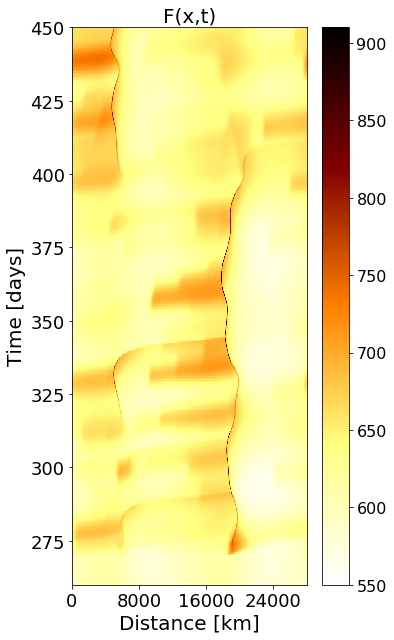

In [127]:

plt.figure(figsize=(5.5,9))
im=plt.pcolormesh(x/1e3,t[it0:]/86400,F[it0:],vmin=550, vmax=910,cmap='afmhot_r')
cbar=plt.colorbar(im)
cbar.ax.tick_params(labelsize=16)
plt.ylim(260,450)
plt.xlabel('Distance [km]', fontsize=20)
plt.xticks(np.arange(0,30000,8000), fontsize=18)
plt.tick_params(labelsize=18)
plt.ylabel('Time [days]', fontsize=20)
plt.title("F(x,t)", fontsize=20)
plt.tight_layout()
# plt.savefig("figure_pdf/lwa_flux_random.pdf")


